# Updating mutation plots

In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import warnings 
import numpy as np
import pandas as pd
import seaborn as sns
import muon as mu


warnings.filterwarnings('ignore')
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=200, facecolor='white')

/home/prisb/anaconda3/envs/datascience/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-07-11 14:58:47.729299: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-11 14:58:47.733646: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-11 14:58:47.744217: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752209927.761460  203591 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752209927.766744  203591 cuda_bla

In [ ]:
adata = sc.read_h5ad("14_gene_expression.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 38231 × 28762
    obs: 'BARCODE', 'BEST', 'category', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'patient', 'dataset_name', 'timepoint', 'disease_state', 'outcome_C12D29', 'specific_outcome_C12D29', 'dataset', 'celltype', 'barcode', 'celltype_group', 'outcome_C6D28', 'specific_outcome_C6D28', 'timepoint_coarse', 'leiden', 'new_celltype', 'patient_alias', 'leiden_and_celltype', 'chr17_76736877_G_A_call', 'chr17_76736877_G_A_mut', 'chr17_76736877_G_C_call', 'chr17_76736877_G_C_mut', 'chr17_76736877_G_T_call', 'chr17_76736877_G_T_mut', 'chr17_7674250_C_T_call', 'chr17_7674250_C_T_mut', 'chr17_7675082_G_T_call', 'chr17_7675082_G_T_mut', 'chr17_7676051_G_C_call', 'chr17_7676051_G_C_mut', 'infercnv_new_celltype', 'inflammation_score', 'LSC17_score', 'cell_cycle_score', 'S_score', 'G2M_score', 'phase', 'celltype_v2', 'Apoptosis_score'
    var: 'highly_variable', 'means', 'disp

In [4]:
adata.obs['timepoint_coarse'].value_counts()

timepoint_coarse
pre            13693
mid            12010
progression     6828
post            5093
Healthy          607
Name: count, dtype: int64

In [5]:
new_adata_HSC_nohealthy = adata[adata.obs["patient"].str.startswith("61")]
new_adata_HSC_nohealthy.obs["disease_state"].value_counts()

disease_state
MDS    37624
Name: count, dtype: int64

In [6]:
#check if barcodes are duplicated
new_adata_HSC_nohealthy.obs_names.duplicated().sum()

np.int64(0)

In [36]:
sc_mut = pd.read_csv("data/single_cell_mutation_for_priscilla.csv")

In [37]:
sc_mut = sc_mut.iloc[:,1:]

In [38]:
sc_mut.set_index("barcode_index", inplace=True)

In [39]:
sc_mut.fillna("na", inplace=True)
sc_mut

,BARCODE,chr17_76736877_G_A_call,chr17_76736877_G_A_mut,chr17_76736877_G_C_call,chr17_76736877_G_C_mut,chr17_76736877_G_T_call,chr17_76736877_G_T_mut,chr17_7674250_C_T_call,chr17_7674250_C_T_mut,chr17_7675082_G_T_call,chr17_7675082_G_T_mut,chr17_7676051_G_C_call,chr17_7676051_G_C_mut
barcode_index,,,,,,,,,,,,,
TATTACCAGCCCAACC-1,TATTACCAGCCCAACC-1,unknown,False,unknown,False,mt,True,unknown,False,unknown,False,unknown,False
GTAACTGCACCAGTTA-1,GTAACTGCACCAGTTA-1,unknown,False,wt,False,unknown,False,unknown,True,unknown,False,unknown,True
AGCATACAGTGGTAAT-1,AGCATACAGTGGTAAT-1,unknown,False,unknown,False,unknown,False,unknown,True,unknown,False,unknown,True
TGCTGCTGTAAACACA-1,TGCTGCTGTAAACACA-1,unknown,False,wt,False,mt,True,unknown,False,unknown,False,unknown,False
CAGATCAAGGCTAGCA-1,CAGATCAAGGCTAGCA-1,unknown,False,wt,False,unknown,False,unknown,True,unknown,False,unknown,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGCGGTCTCATGTCTT-1,AGCGGTCTCATGTCTT-1,unknown,False,unknown,True,unknown,False,unknown,False,unknown,False,unknown,False
CACAGGCCATGGAATA-1,CACAGGCCATGGAATA-1,unknown,False,unknown,True,unknown,False,unknown,False,unknown,False,unknown,False
CGCTGGATCCGAGCCA-1,CGCTGGATCCGAGCCA-1,unknown,True,unknown,False,unknown,False,unknown,False,unknown,False,unknown,False


In [40]:
sc_mut = sc_mut.drop(columns=["BARCODE"])

In [41]:
missing_ids = sc_mut.index.difference(new_adata_HSC_nohealthy.obs.index)
if not missing_ids.empty:
    print("Warning: The following IDs are in df but not in adata.obs:", missing_ids)

# Proceed with reindexing or merging
sc_mut = sc_mut.reindex(new_adata_HSC_nohealthy.obs.index).fillna("na")
adata_sc_mut = new_adata_HSC_nohealthy.copy()
adata_sc_mut.obs = adata_sc_mut.obs.join(sc_mut)
adata_sc_mut.obs

       'AAAGATGGTTATGCGT-1', 'AAAGCAACAGGGTACA-1', 'AAAGCAACAGTGGAGT-1',
       'AAAGCAAGTTTGGCGC-1', 'AAAGCAAGTTTGTTGG-1', 'AAATGCCGTCGGGTCT-1',
       'AAATGCCTCACCAGGC-1',
       ...
       'TTTCCTCAGGAATGGA-1', 'TTTCCTCGTACCGCTG-1', 'TTTGCGCTCCACGCAG-1',
       'TTTGCGCTCCCGGATG-1', 'TTTGCGCTCGCCTGTT-1', 'TTTGGTTGTGACCAAG-1',
       'TTTGGTTGTTCGTTGA-1', 'TTTGTCACACGAAGCA-1', 'TTTGTCACAGACTCGC-1',
       'TTTGTCATCACATACG-1'],
      dtype='object', length=805)


,BARCODE,BEST,category,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,...,chr17_76736877_G_C_call,chr17_76736877_G_C_mut,chr17_76736877_G_T_call,chr17_76736877_G_T_mut,chr17_7674250_C_T_call,chr17_7674250_C_T_mut,chr17_7675082_G_T_call,chr17_7675082_G_T_mut,chr17_7676051_G_C_call,chr17_7676051_G_C_mut
AAACCTGAGAAGAAGC-1,AAACCTGAGAAGAAGC-1,SNG-206902510049_R04C01,Single,2785,2784,7058.0,207.0,2.932842,1970.0,27.911589,...,na,na,na,na,na,na,na,na,na,na
AAACCTGAGCGTTTAC-1,AAACCTGAGCGTTTAC-1,SNG-206902510049_R05C01,Single,1537,1537,5833.0,16.0,0.274301,3309.0,56.728954,...,na,na,na,na,na,na,na,na,na,na
AAACCTGCAAATCCGT-1,AAACCTGCAAATCCGT-1,SNG-206902510049_R04C01,Single,4486,4485,13971.0,457.0,3.271062,3440.0,24.622433,...,na,na,na,na,na,na,na,na,na,na
AAACCTGGTCCAACTA-1,AAACCTGGTCCAACTA-1,SNG-206902510049_R05C01,Single,6426,6422,29369.0,1008.0,3.432190,9740.0,33.164223,...,na,na,na,na,na,na,na,na,na,na
AAACGGGCACCATCCT-1,AAACGGGCACCATCCT-1,SNG-206902510049_R05C01,Single,412,411,525.0,9.0,1.714286,103.0,19.619047,...,na,na,na,na,na,na,na,na,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTACATCCTTTCGG-1,TTCTACATCCTTTCGG-1,SNG-207071120017_R07C01,Single,3358,3353,9243.0,376.0,4.067943,1859.0,20.112518,...,na,na,na,na,na,na,na,na,na,na
TTCTCAAAGTCCCACG-1,TTCTCAAAGTCCCACG-1,SNG-207071120017_R07C01,Single,1524,1521,5608.0,96.0,1.711840,307.0,5.474322,...,na,na,na,na,na,na,na,na,na,na
TTCTCAATCGCAAGCC-1,TTCTCAATCGCAAGCC-1,SNG-207071120017_R07C01,Single,428,427,3676.0,24.0,0.652884,19.0,0.516866,...,na,na,na,na,na,na,na,na,na,na
TTGAACGAGAGCAATT-1,TTGAACGAGAGCAATT-1,SNG-207071120017_R07C01,Single,1780,1778,5039.0,137.0,2.718793,865.0,17.166105,...,na,na,na,na,na,na,na,na,na,na


In [42]:
adata_sc_mut.obs[['timepoint','timepoint_coarse']].value_counts()

timepoint      timepoint_coarse
C1D1           pre                 13690
C7D1           mid                 10720
Progression    progression          6828
C12D29         post                 5093
C6D8           mid                  1140
C7D22          mid                   150
C1D8           pre                     3
not available  not available           2
Name: count, dtype: int64

In [43]:
adata_sc_mut[adata_sc_mut.obs['chr17_76736877_G_A_call'].dropna().index,:].obs[['dataset_name','patient_alias']].value_counts()

dataset_name       patient_alias
HSPC_pool2         P17              2566
HSPC_pool1         P18              2032
HSPC_pool3_repeat  P18              2005
HSPC_pool1         P01              1807
                   P09              1760
HSPC_pool4         P17              1735
                   P03              1662
                   P01              1602
HSPC_pool2         P08              1555
HSPC_pool4         P09              1463
HSPC_pool3_repeat  P03              1401
HSPC_pool1         P03              1400
HSPC_pool3_repeat  P02              1396
HSPC_pool2         P09              1331
HSPC_pool1         P02              1328
HSPC_pool2         P02              1324
HSPC_pool3_repeat  P08              1262
                   P17              1236
                   P12              1046
HSPC_pool4         P18               958
HSPC_pool2         P01               903
hashtag_C1D1       P12               883
HSPC_pool4         P12               728
hashtag_C6D8       P11  

In [44]:
adata_sc_mut

AnnData object with n_obs × n_vars = 37626 × 28762
    obs: 'BARCODE', 'BEST', 'category', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'patient', 'dataset_name', 'timepoint', 'disease_state', 'outcome_C12D29', 'specific_outcome_C12D29', 'dataset', 'celltype', 'barcode', 'celltype_group', 'outcome_C6D28', 'specific_outcome_C6D28', 'timepoint_coarse', 'leiden', 'new_celltype', 'patient_alias', 'chr17_76736877_G_A_call', 'chr17_76736877_G_A_mut', 'chr17_76736877_G_C_call', 'chr17_76736877_G_C_mut', 'chr17_76736877_G_T_call', 'chr17_76736877_G_T_mut', 'chr17_7674250_C_T_call', 'chr17_7674250_C_T_mut', 'chr17_7675082_G_T_call', 'chr17_7675082_G_T_mut', 'chr17_7676051_G_C_call', 'chr17_7676051_G_C_mut'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'dataset_colors', 'disease_state_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'outcome_C12D29_colors', '

In [45]:
adata_sc_mut.obs

,BARCODE,BEST,category,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,...,chr17_76736877_G_C_call,chr17_76736877_G_C_mut,chr17_76736877_G_T_call,chr17_76736877_G_T_mut,chr17_7674250_C_T_call,chr17_7674250_C_T_mut,chr17_7675082_G_T_call,chr17_7675082_G_T_mut,chr17_7676051_G_C_call,chr17_7676051_G_C_mut
AAACCTGAGAAGAAGC-1,AAACCTGAGAAGAAGC-1,SNG-206902510049_R04C01,Single,2785,2784,7058.0,207.0,2.932842,1970.0,27.911589,...,na,na,na,na,na,na,na,na,na,na
AAACCTGAGCGTTTAC-1,AAACCTGAGCGTTTAC-1,SNG-206902510049_R05C01,Single,1537,1537,5833.0,16.0,0.274301,3309.0,56.728954,...,na,na,na,na,na,na,na,na,na,na
AAACCTGCAAATCCGT-1,AAACCTGCAAATCCGT-1,SNG-206902510049_R04C01,Single,4486,4485,13971.0,457.0,3.271062,3440.0,24.622433,...,na,na,na,na,na,na,na,na,na,na
AAACCTGGTCCAACTA-1,AAACCTGGTCCAACTA-1,SNG-206902510049_R05C01,Single,6426,6422,29369.0,1008.0,3.432190,9740.0,33.164223,...,na,na,na,na,na,na,na,na,na,na
AAACGGGCACCATCCT-1,AAACGGGCACCATCCT-1,SNG-206902510049_R05C01,Single,412,411,525.0,9.0,1.714286,103.0,19.619047,...,na,na,na,na,na,na,na,na,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTACATCCTTTCGG-1,TTCTACATCCTTTCGG-1,SNG-207071120017_R07C01,Single,3358,3353,9243.0,376.0,4.067943,1859.0,20.112518,...,na,na,na,na,na,na,na,na,na,na
TTCTCAAAGTCCCACG-1,TTCTCAAAGTCCCACG-1,SNG-207071120017_R07C01,Single,1524,1521,5608.0,96.0,1.711840,307.0,5.474322,...,na,na,na,na,na,na,na,na,na,na
TTCTCAATCGCAAGCC-1,TTCTCAATCGCAAGCC-1,SNG-207071120017_R07C01,Single,428,427,3676.0,24.0,0.652884,19.0,0.516866,...,na,na,na,na,na,na,na,na,na,na
TTGAACGAGAGCAATT-1,TTGAACGAGAGCAATT-1,SNG-207071120017_R07C01,Single,1780,1778,5039.0,137.0,2.718793,865.0,17.166105,...,na,na,na,na,na,na,na,na,na,na


In [46]:
print(adata_sc_mut.obs.dtypes)

BARCODE                    category
BEST                       category
category                   category
n_genes                       int64
n_genes_by_counts             int32
total_counts                float32
total_counts_mt             float32
pct_counts_mt               float32
total_counts_ribo           float32
pct_counts_ribo             float32
patient                    category
dataset_name               category
timepoint                  category
disease_state              category
outcome_C12D29             category
specific_outcome_C12D29    category
dataset                    category
celltype                   category
barcode                    category
celltype_group             category
outcome_C6D28              category
specific_outcome_C6D28     category
timepoint_coarse           category
leiden                     category
new_celltype               category
patient_alias              category
chr17_76736877_G_A_call      object
chr17_76736877_G_A_mut      

In [47]:
adata_sc_mut.obs[adata_sc_mut.obs.select_dtypes('object').columns] = adata_sc_mut.obs[adata_sc_mut.obs.select_dtypes('object').columns].astype(str).astype("category")

In [48]:
adata_sc_mut.obs

,BARCODE,BEST,category,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,...,chr17_76736877_G_C_call,chr17_76736877_G_C_mut,chr17_76736877_G_T_call,chr17_76736877_G_T_mut,chr17_7674250_C_T_call,chr17_7674250_C_T_mut,chr17_7675082_G_T_call,chr17_7675082_G_T_mut,chr17_7676051_G_C_call,chr17_7676051_G_C_mut
AAACCTGAGAAGAAGC-1,AAACCTGAGAAGAAGC-1,SNG-206902510049_R04C01,Single,2785,2784,7058.0,207.0,2.932842,1970.0,27.911589,...,na,na,na,na,na,na,na,na,na,na
AAACCTGAGCGTTTAC-1,AAACCTGAGCGTTTAC-1,SNG-206902510049_R05C01,Single,1537,1537,5833.0,16.0,0.274301,3309.0,56.728954,...,na,na,na,na,na,na,na,na,na,na
AAACCTGCAAATCCGT-1,AAACCTGCAAATCCGT-1,SNG-206902510049_R04C01,Single,4486,4485,13971.0,457.0,3.271062,3440.0,24.622433,...,na,na,na,na,na,na,na,na,na,na
AAACCTGGTCCAACTA-1,AAACCTGGTCCAACTA-1,SNG-206902510049_R05C01,Single,6426,6422,29369.0,1008.0,3.432190,9740.0,33.164223,...,na,na,na,na,na,na,na,na,na,na
AAACGGGCACCATCCT-1,AAACGGGCACCATCCT-1,SNG-206902510049_R05C01,Single,412,411,525.0,9.0,1.714286,103.0,19.619047,...,na,na,na,na,na,na,na,na,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTACATCCTTTCGG-1,TTCTACATCCTTTCGG-1,SNG-207071120017_R07C01,Single,3358,3353,9243.0,376.0,4.067943,1859.0,20.112518,...,na,na,na,na,na,na,na,na,na,na
TTCTCAAAGTCCCACG-1,TTCTCAAAGTCCCACG-1,SNG-207071120017_R07C01,Single,1524,1521,5608.0,96.0,1.711840,307.0,5.474322,...,na,na,na,na,na,na,na,na,na,na
TTCTCAATCGCAAGCC-1,TTCTCAATCGCAAGCC-1,SNG-207071120017_R07C01,Single,428,427,3676.0,24.0,0.652884,19.0,0.516866,...,na,na,na,na,na,na,na,na,na,na
TTGAACGAGAGCAATT-1,TTGAACGAGAGCAATT-1,SNG-207071120017_R07C01,Single,1780,1778,5039.0,137.0,2.718793,865.0,17.166105,...,na,na,na,na,na,na,na,na,na,na


In [49]:
#adata_sc_mut.write_h5ad("15_adata_sc_mut.h5ad")

# Update zorder dynamically

In [2]:
adata_sc_mut = sc.read_h5ad("13052025_updated_annotations_colors_scores.h5ad")

In [3]:
newdf=pd.DataFrame({
    "X_coord_umap":adata_sc_mut.obsm["X_umap"][:,0],
    "Y_coord_umap":adata_sc_mut.obsm["X_umap"][:,1],
    "celltype":adata_sc_mut.obs["celltype_v2"],
    "outcome_C6D28":adata_sc_mut.obs["outcome_C6D28"],
    'outcome_C12D29':adata_sc_mut.obs["outcome_C12D29"],
    "timepoint_coarse":adata_sc_mut.obs["timepoint_coarse"],
    "patient":adata_sc_mut.obs["patient"],
    "patient_alias": adata_sc_mut.obs["patient_alias"],
    'leiden': adata_sc_mut.obs["leiden"],
    'chr17_76736877_G_A_call': adata_sc_mut.obs['chr17_76736877_G_A_call'],
    'chr17_76736877_G_A_mut': adata_sc_mut.obs['chr17_76736877_G_A_mut'],
    'chr17_76736877_G_C_call': adata_sc_mut.obs['chr17_76736877_G_C_call'],
    'chr17_76736877_G_C_mut': adata_sc_mut.obs['chr17_76736877_G_C_mut'],
    'chr17_76736877_G_T_call': adata_sc_mut.obs['chr17_76736877_G_T_call'],
    'chr17_76736877_G_T_mut': adata_sc_mut.obs['chr17_76736877_G_T_mut'],
    'chr17_7674250_C_T_call': adata_sc_mut.obs['chr17_7674250_C_T_call'],
    'chr17_7674250_C_T_mut': adata_sc_mut.obs['chr17_7674250_C_T_mut'],
    'chr17_7675082_G_T_call': adata_sc_mut.obs['chr17_7675082_G_T_call'],
    'chr17_7675082_G_T_mut': adata_sc_mut.obs['chr17_7675082_G_T_mut'],
    'chr17_7676051_G_C_call': adata_sc_mut.obs['chr17_7676051_G_C_call'],
    'chr17_7676051_G_C_mut': adata_sc_mut.obs['chr17_7676051_G_C_mut']
})
newdf

,X_coord_umap,Y_coord_umap,celltype,outcome_C6D28,outcome_C12D29,timepoint_coarse,patient,patient_alias,leiden,chr17_76736877_G_A_call,...,chr17_76736877_G_C_call,chr17_76736877_G_C_mut,chr17_76736877_G_T_call,chr17_76736877_G_T_mut,chr17_7674250_C_T_call,chr17_7674250_C_T_mut,chr17_7675082_G_T_call,chr17_7675082_G_T_mut,chr17_7676051_G_C_call,chr17_7676051_G_C_mut
AAACCTGAGAAGAAGC-1,10.981606,12.418462,Atypical cluster E,Responder,Responder,pre,61289001,P11,20,na,...,na,na,na,na,na,na,na,na,na,na
AAACCTGAGCGTTTAC-1,12.689439,3.141997,HSC,Responder,Responder,pre,61213005,P12,2,na,...,na,na,na,na,na,na,na,na,na,na
AAACCTGCAAATCCGT-1,10.337970,12.174479,Atypical cluster E,Responder,Responder,pre,61289001,P11,20,na,...,na,na,na,na,na,na,na,na,na,na
AAACCTGGTCCAACTA-1,8.816384,7.991989,GMP,Responder,Responder,pre,61213005,P12,5,na,...,na,na,na,na,na,na,na,na,na,na
AAACGGGCACCATCCT-1,11.258220,14.470355,Atypical cluster F,Responder,Responder,pre,61213005,P12,22,na,...,na,na,na,na,na,na,na,na,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTACATCCTTTCGG-1,7.360431,14.479185,Monocyte progenitor,Responder,Responder,mid,61213011,P03,12,na,...,na,na,na,na,na,na,na,na,na,na
TTCTCAAAGTCCCACG-1,4.390059,-5.537665,Erythroblast,Responder,Responder,mid,61213011,P03,24,na,...,na,na,na,na,na,na,na,na,na,na
TTCTCAATCGCAAGCC-1,5.326890,-6.119246,Erythroblast,Responder,Responder,mid,61213011,P03,24,na,...,na,na,na,na,na,na,na,na,na,na
TTGAACGAGAGCAATT-1,5.478138,14.661095,Monocyte progenitor,Responder,Responder,mid,61213011,P03,12,na,...,na,na,na,na,na,na,na,na,na,na


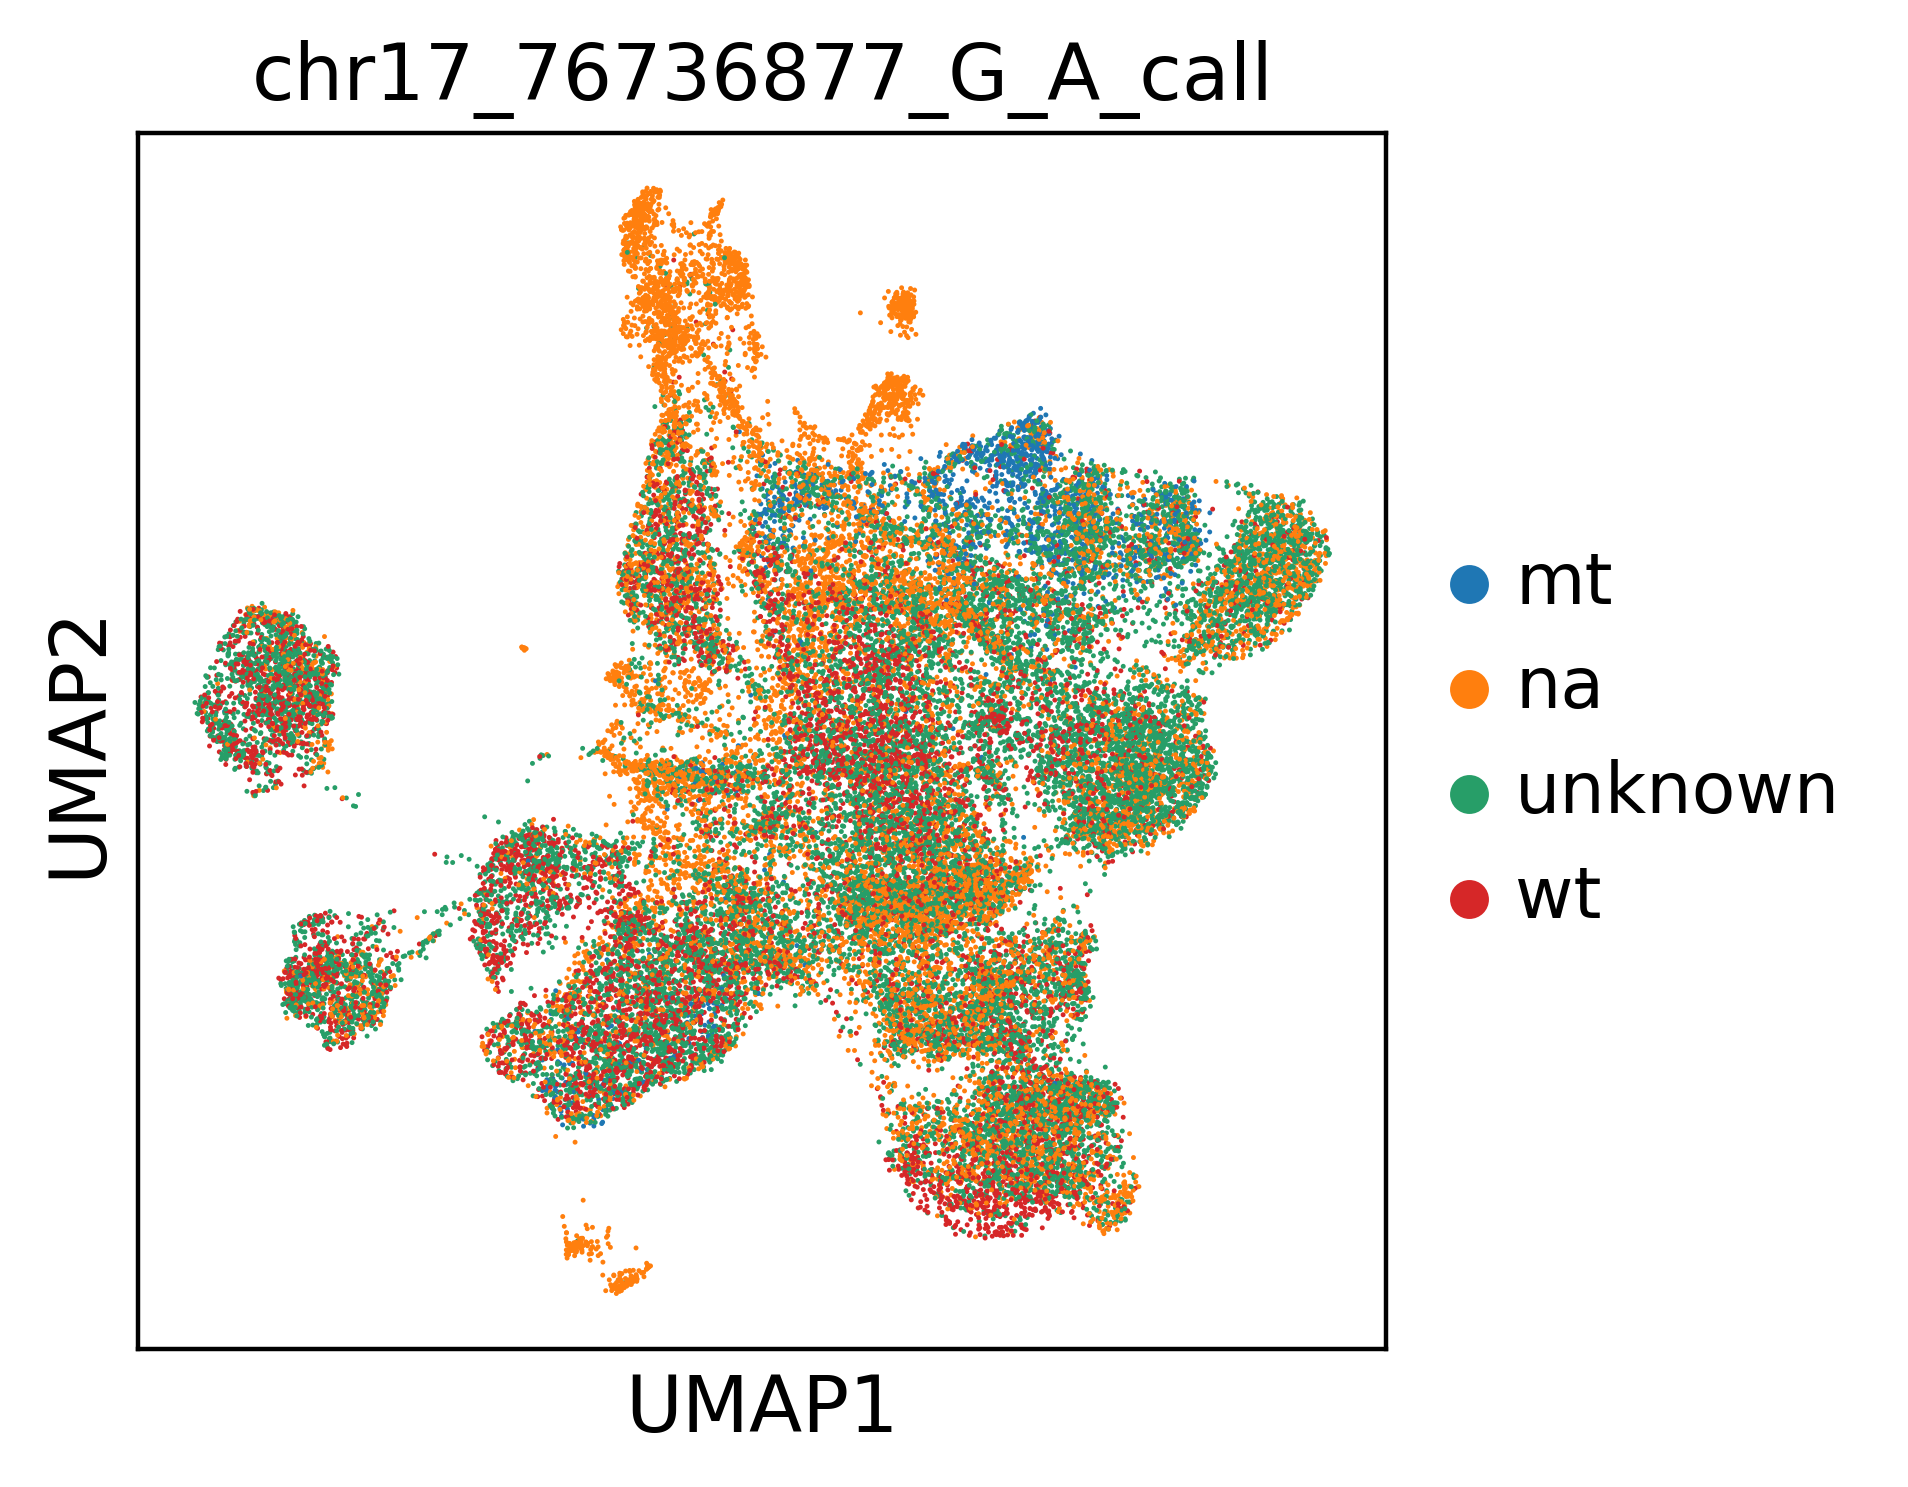

In [4]:
sc.pl.umap(adata_sc_mut, color=['chr17_76736877_G_A_call'])

In [ ]:
from MDS_figure2_dicts import *
newdf['ctgrey'] = "#c8c8c8"

{'chr17:76736877_G>C': 'SRSF2',
 'chr17:7675082_G>T': 'TP53',
 'chr17:76736877_G>A': 'SRSF2',
 'chr17:76736877_G>T': 'SRSF2',
 'chr17:7674250_C>T': 'TP53',
 'chr17:7676051_G>C': 'TP53'}

In [12]:
newdf[newdf['patient_alias'] == "P03"]

,X_coord_umap,Y_coord_umap,celltype,outcome_C6D28,outcome_C12D29,timepoint_coarse,patient,patient_alias,leiden,chr17_76736877_G_A_call,...,chr17_76736877_G_C_mut,chr17_76736877_G_T_call,chr17_76736877_G_T_mut,chr17_7674250_C_T_call,chr17_7674250_C_T_mut,chr17_7675082_G_T_call,chr17_7675082_G_T_mut,chr17_7676051_G_C_call,chr17_7676051_G_C_mut,ctgrey
AAACCTGAGCTGTTCA-1,6.453835,1.596934,MEP/MKP,Responder,Responder,post,61213011,P03,1,unknown,...,False,unknown,False,unknown,False,unknown,True,unknown,False,#c8c8c8
AAACCTGGTCCAGTAT-1,13.417808,-0.129816,Atypical cluster L,Responder,Responder,post,61213011,P03,0,wt,...,False,wt,False,unknown,False,unknown,True,unknown,False,#c8c8c8
AAACGGGGTAATTGGA-1,5.355245,7.968810,Atypical cluster D,Responder,Responder,post,61213011,P03,8,unknown,...,False,unknown,False,unknown,False,unknown,True,unknown,False,#c8c8c8
AAAGATGAGGCTACGA-1,13.068712,-0.086187,Atypical cluster M,Responder,Responder,post,61213011,P03,4,unknown,...,False,wt,False,unknown,False,unknown,True,unknown,False,#c8c8c8
AAAGCAACAGATCCAT-1,10.547558,2.812750,MPP,Responder,Responder,post,61213011,P03,6,unknown,...,False,unknown,False,unknown,False,unknown,True,unknown,False,#c8c8c8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTACATCCTTTCGG-1,7.360431,14.479185,Monocyte progenitor,Responder,Responder,mid,61213011,P03,12,na,...,na,na,na,na,na,na,na,na,na,#c8c8c8
TTCTCAAAGTCCCACG-1,4.390059,-5.537665,Erythroblast,Responder,Responder,mid,61213011,P03,24,na,...,na,na,na,na,na,na,na,na,na,#c8c8c8
TTCTCAATCGCAAGCC-1,5.326890,-6.119246,Erythroblast,Responder,Responder,mid,61213011,P03,24,na,...,na,na,na,na,na,na,na,na,na,#c8c8c8
TTGAACGAGAGCAATT-1,5.478138,14.661095,Monocyte progenitor,Responder,Responder,mid,61213011,P03,12,na,...,na,na,na,na,na,na,na,na,na,#c8c8c8


In [7]:
newdf[(newdf['patient_alias'] == "P03") & (newdf['timepoint_coarse'] == 'mid')]['outcome_C6D28'].value_counts().idxmax()

'Responder'

In [8]:
newdf['timepoint_coarse'].value_counts()

timepoint_coarse
pre            13693
mid            12010
progression     6828
post            5093
Healthy          607
Name: count, dtype: int64

In [9]:
newdf.columns[newdf.columns.str.contains('call')]

Index(['chr17_76736877_G_A_call', 'chr17_76736877_G_C_call',
       'chr17_76736877_G_T_call', 'chr17_7674250_C_T_call',
       'chr17_7675082_G_T_call', 'chr17_7676051_G_C_call'],
      dtype='object')

In [11]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import re

# Define mappings
size_mapping = {'unknown': 10, 'wt': 15, 'mt': 15}
color_map = {'unknown': '#fe9003', 'wt': '#2cace3', 'mt': '#e90c8b'}
zorder_map = {'unknown': 1, 'wt': 2, 'mt': 3}

for chr in newdf.columns[newdf.columns.str.contains('call')]:
    for p in newdf['patient_alias'].unique():
        valid_axes_data = []  # Track valid subplots

        for timepoint in ['pre', 'mid', 'post', 'progression']:
            df = newdf[newdf['patient_alias'] == p]
            data = df[df['timepoint_coarse'] == timepoint]

            # Count mutations
            counts = data[chr].value_counts()
            unknown_count = counts.get("unknown", 0)
            wt_count = counts.get("wt", 0)
            mt_count = counts.get("mt", 0)

            # Always fix 'unknown' as zorder = 0
            dynamic_zorder_map = {'unknown': 1}

            # Get counts for mt and wt
            mt_count = counts.get('mt', 0)
            wt_count = counts.get('wt', 0)

            # Sort 'mt' and 'wt' by descending count
            sorted_mutations = sorted(
                [('mt', mt_count), ('wt', wt_count)],
                key=lambda x: x[1], reverse=True)

            # Assign zorder starting from 1 (above unknown)
            for i, (mut_type, _) in enumerate(sorted_mutations, start=2):
                dynamic_zorder_map[mut_type] = i

            # Skip subplot if all counts are zero
            if wt_count == 0 and unknown_count == 0 and mt_count == 0:
                continue

            valid_axes_data.append((timepoint, data))

        # If no valid subplots exist, skip this figure
        if not valid_axes_data:
            continue

        # Dynamically create figure with the correct number of subplots
        fig, axes = plt.subplots(1, len(valid_axes_data), figsize=(6 * len(valid_axes_data), 6), dpi=300)

        # Ensure axes is iterable (if only one subplot, `axes` is not a list)
        if len(valid_axes_data) == 1:
            axes = [axes]

        for ax, (timepoint, data) in zip(axes, valid_axes_data):
            # Plot background UMAP scatter (rasterized for efficiency)
            ax.scatter(newdf['X_coord_umap'], newdf['Y_coord_umap'], 
                       c=newdf['ctgrey'], s=5, alpha=0.3, rasterized=True)

            # Overlay mutation points (rasterized for efficiency)
            for category in ['unknown', 'wt', 'mt']:
                subset = data[data[chr] == category]
                if not subset.empty:
                    ax.scatter(subset['X_coord_umap'], subset['Y_coord_umap'],
                               s=size_mapping[category], c=color_map[category],
                               zorder=dynamic_zorder_map[category], edgecolors='none', 
                               label=category, rasterized=True)

            # Display counts
            counts = data[chr].value_counts()
            text_str = f"unknown: {counts.get('unknown', 0)}\nwt: {counts.get('wt', 0)}\nmt: {counts.get('mt', 0)}"
            ax.text(0.95, 0.95, text_str, transform=ax.transAxes, ha="right", va="top", fontsize=15)

            ax.set_title(f"{p} {timepoint}", fontsize=25)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.grid(False)

        # Adjust layout dynamically
        fig.suptitle(chr, fontsize=40)
        fig.tight_layout()

        # Create legend
        handles = [mlines.Line2D([0], [0], marker='o', linestyle='', markersize=20,
                                markerfacecolor=color_map[label],markeredgecolor=color_map[label],
                                label=label) for label in color_map.keys()]
        fig.legend(handles=handles, title='Mutations', loc="upper center",
                   bbox_to_anchor=(0.5, -0.1), fontsize=20, ncol=3)

        # Save figure as PDF with rasterization
        savefigname = re.sub(r"[^\w]", "_", str(chr))
        fig.savefig(f"figures/mutation_calls/{savefigname}_{p}_UMAP_v3.pdf", 
                    format='pdf', bbox_inches='tight', dpi=200)
        #fig.savefig(f"figures/mutation_calls/{savefigname}_{p}_UMAP_v3.png", 
        #            format='png', bbox_inches='tight', dpi=300)            

        plt.close(fig)


In [18]:
#map mutations across the proteome

mdata_sc_mut = mu.read_h5mu("06052025_gex_adt_celltypev2_updated_colors.h5mu")

In [ ]:
mdata_sc_mut['protein'].obs[""]

MuData object with n_obs × n_vars = 46444 × 29034
  2 modalities
    rna:	38231 x 28762
      obs:	'BARCODE', 'BEST', 'category', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'patient', 'dataset_name', 'timepoint', 'disease_state', 'outcome_C12D29', 'specific_outcome_C12D29', 'dataset', 'celltype', 'barcode', 'celltype_group', 'outcome_C6D28', 'specific_outcome_C6D28', 'timepoint_coarse', 'leiden', 'new_celltype', 'patient_alias', 'leiden_and_celltype', 'chr17_76736877_G_A_call', 'chr17_76736877_G_A_mut', 'chr17_76736877_G_C_call', 'chr17_76736877_G_C_mut', 'chr17_76736877_G_T_call', 'chr17_76736877_G_T_mut', 'chr17_7674250_C_T_call', 'chr17_7674250_C_T_mut', 'chr17_7675082_G_T_call', 'chr17_7675082_G_T_mut', 'chr17_7676051_G_C_call', 'chr17_7676051_G_C_mut', 'infercnv_new_celltype', 'inflammation_score', 'LSC17_score', 'cell_cycle_score', 'S_score', 'G2M_score', 'phase', 'celltype_v2'
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'chromosome', 'gene', 'start', 'end'
      uns:	'celltype_colors', 'celltype_v2_colors', 'cnv', 'dataset_colors', 'disease_state_colors', 'hvg', 'infercnv_new_celltype_colors', 'leiden', 'leiden_and_celltype_colors', 'leiden_colors', 'neighbors', 'new_celltype_colors', 'outcome_C12D29_colors', 'outcome_C6D28_colors', 'outcome_C6D8', 'outcome_C6D8_colors', 'patient_alias_colors', 'patient_colors', 'pca', 'phase_colors', 'rank_genes_groups', 'rank_genes_groups_outcomeC6D28', 'rna:celltype_v2_colors', 'umap'
      obsm:	'X_cnv', 'X_pca', 'X_umap'
      varm:	'PCs'
      obsp:	'connectivities', 'distances'
    protein:	41842 x 272
      obs:	'dataset', 'celltype_v2'
      uns:	'dataset_colors'
      obsm:	'X_pca', 'X_umap'
      layers:	'counts'

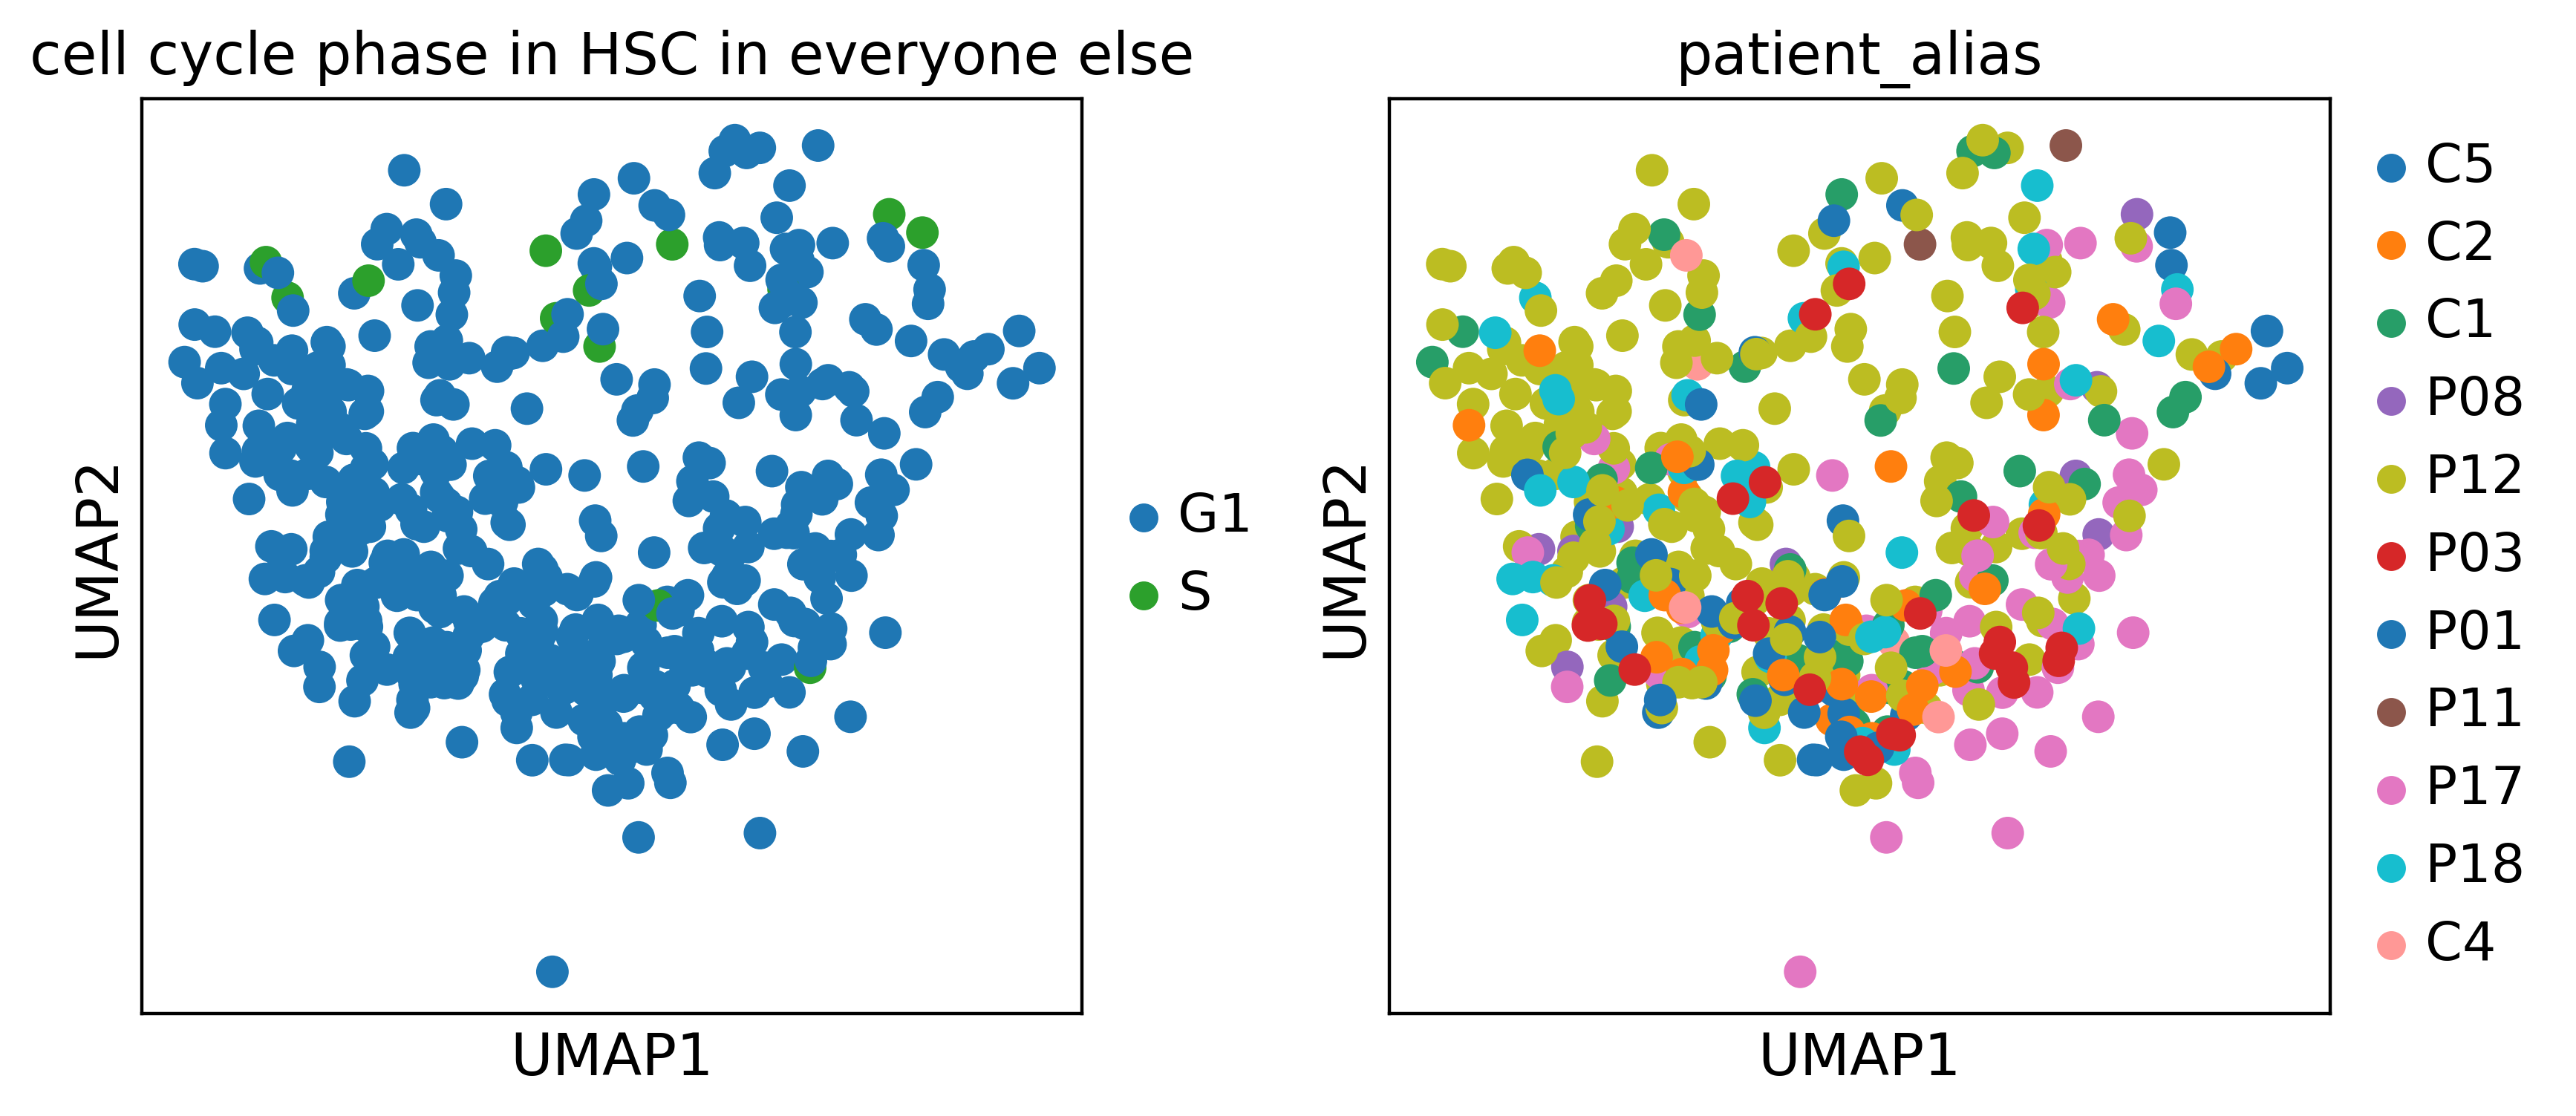

In [26]:
sc.pl.umap(adata_sc_mut[(adata_sc_mut.obs['celltype_v2'] == "HSC") & (adata_sc_mut.obs['patient_alias'] != "P09")], color=["phase","patient_alias"], title="cell cycle phase in HSC in everyone else")

In [27]:
hsc_p09 = adata_sc_mut[(adata_sc_mut.obs['celltype_v2'] == "HSC") & (adata_sc_mut.obs['patient_alias'] == "P09")]
hsc_else = adata_sc_mut[(adata_sc_mut.obs['celltype_v2'] == "HSC") & (adata_sc_mut.obs['patient_alias'] != "P09")]

In [28]:
hsc_p09.obs["phase"].value_counts()

phase
G1    2331
S       90
Name: count, dtype: int64

In [30]:
90/2331

0.03861003861003861

In [29]:
hsc_else.obs["phase"].value_counts()

phase
G1    467
S      13
Name: count, dtype: int64

In [31]:
13/467

0.027837259100642397

# Updating celltype to include HSC_P09 and additional mutation calls

In [2]:
mdata = mu.read_h5mu("06052025_gex_adt_celltypev2_updated_colors.h5mu")
mdata

MuData object with n_obs × n_vars = 46444 × 29034
  2 modalities
    rna:	38231 x 28762
      obs:	'BARCODE', 'BEST', 'category', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'patient', 'dataset_name', 'timepoint', 'disease_state', 'outcome_C12D29', 'specific_outcome_C12D29', 'dataset', 'celltype', 'barcode', 'celltype_group', 'outcome_C6D28', 'specific_outcome_C6D28', 'timepoint_coarse', 'leiden', 'new_celltype', 'patient_alias', 'leiden_and_celltype', 'chr17_76736877_G_A_call', 'chr17_76736877_G_A_mut', 'chr17_76736877_G_C_call', 'chr17_76736877_G_C_mut', 'chr17_76736877_G_T_call', 'chr17_76736877_G_T_mut', 'chr17_7674250_C_T_call', 'chr17_7674250_C_T_mut', 'chr17_7675082_G_T_call', 'chr17_7675082_G_T_mut', 'chr17_7676051_G_C_call', 'chr17_7676051_G_C_mut', 'infercnv_new_celltype', 'inflammation_score', 'LSC17_score', 'cell_cycle_score', 'S_score', 'G2M_score', 'phase', 'celltype_v2'
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'chromosome', 'gene', 'start', 'end'
      uns:	'celltype_colors', 'celltype_v2_colors', 'cnv', 'dataset_colors', 'disease_state_colors', 'hvg', 'infercnv_new_celltype_colors', 'leiden', 'leiden_and_celltype_colors', 'leiden_colors', 'neighbors', 'new_celltype_colors', 'outcome_C12D29_colors', 'outcome_C6D28_colors', 'outcome_C6D8', 'outcome_C6D8_colors', 'patient_alias_colors', 'patient_colors', 'pca', 'phase_colors', 'rank_genes_groups', 'rank_genes_groups_outcomeC6D28', 'rna:celltype_v2_colors', 'umap'
      obsm:	'X_cnv', 'X_pca', 'X_umap'
      varm:	'PCs'
      obsp:	'connectivities', 'distances'
    protein:	41842 x 272
      obs:	'dataset', 'celltype_v2'
      uns:	'dataset_colors'
      obsm:	'X_pca', 'X_umap'
      layers:	'counts'

In [ ]:
mdata.mod['rna'].obs['celltype_v3'] = adata.obs['celltype_v2'].copy()
adata.obs['celltype_v3'] = adata.obs['celltype_v3'].cat.add_categories(['HSC_P09'])
mdata.mod['rna'].obs.loc[
    (mdata.mod['rna'].obs['patient_alias'] == 'P09') & (adata.obs['celltype_v3'] == 'HSC'),
    'celltype_v3'
] = 'HSC_P09'
mdata.mod['rna'].obs[['patient_alias', 'celltype_v3']]

,patient_alias,celltype_v3
hashtag_C1D1_AAACCTGAGAAGAAGC-1,P11,Atypical cluster E
hashtag_C1D1_AAACCTGAGCGTTTAC-1,P12,HSC
hashtag_C1D1_AAACCTGCAAATCCGT-1,P11,Atypical cluster E
hashtag_C1D1_AAACCTGGTCCAACTA-1,P12,GMP
hashtag_C1D1_AAACGGGCACCATCCT-1,P12,Atypical cluster F
...,...,...
Pool7_TTCTACATCCTTTCGG-1,P03,Monocyte progenitor
Pool7_TTCTCAAAGTCCCACG-1,P03,Erythroblast
Pool7_TTCTCAATCGCAAGCC-1,P03,Erythroblast
Pool7_TTGAACGAGAGCAATT-1,P03,Monocyte progenitor


In [4]:
mdata.update()

In [5]:
mdata.mod['protein'].obs['celltype_v3'] = mdata.mod['protein'].obs['celltype_v2'].copy()
mdata.update()

In [6]:
mutation_file2 = pd.read_csv("data/updated_mutations_for_priscilla_17052025.csv")
mutation_file2

,Unnamed: 0,BARCODE,BEST,category,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,...,phase,celltype_v2,chr17_76736877_G_T_call_updated,chr17_76736877_G_A_call_updated,chr17_76736877_G_C_call_updated,chr21_34886879_G_C_mt_updated,chr1_114716126_C_T_mt_updated,chr21_34859485_C_T_mt_updated,chr17_7674250_C_T_call_updated,chr17_7675082_G_T_call_updated
0,AAACCTGAGAAGAAGC-1,AAACCTGAGAAGAAGC-1,SNG-206902510049_R04C01,Single,2785,2784,7058.0,207.0,2.932842,1970.0,...,G1,Atypical cluster E,na,na,na,unknown,unknown,unknown,na,na
1,AAACCTGAGCGTTTAC-1,AAACCTGAGCGTTTAC-1,SNG-206902510049_R05C01,Single,1537,1537,5833.0,16.0,0.274301,3309.0,...,G1,HSC,na,na,na,unknown,unknown,unknown,na,na
2,AAACCTGCAAATCCGT-1,AAACCTGCAAATCCGT-1,SNG-206902510049_R04C01,Single,4486,4485,13971.0,457.0,3.271062,3440.0,...,S,Atypical cluster E,na,na,na,unknown,unknown,unknown,na,na
3,AAACCTGGTCCAACTA-1,AAACCTGGTCCAACTA-1,SNG-206902510049_R05C01,Single,6426,6422,29369.0,1008.0,3.432190,9740.0,...,G1,GMP,na,na,na,unknown,unknown,unknown,na,na
4,AAACGGGCACCATCCT-1,AAACGGGCACCATCCT-1,SNG-206902510049_R05C01,Single,412,411,525.0,9.0,1.714286,103.0,...,G1,Atypical cluster F,na,na,na,unknown,unknown,unknown,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38226,TTCTACATCCTTTCGG-1,TTCTACATCCTTTCGG-1,SNG-207071120017_R07C01,Single,3358,3353,9243.0,376.0,4.067943,1859.0,...,G1,Monocyte progenitor,na,na,na,unknown,unknown,unknown,na,na
38227,TTCTCAAAGTCCCACG-1,TTCTCAAAGTCCCACG-1,SNG-207071120017_R07C01,Single,1524,1521,5608.0,96.0,1.711840,307.0,...,G2M,Erythroblast,na,na,na,unknown,unknown,unknown,na,na
38228,TTCTCAATCGCAAGCC-1,TTCTCAATCGCAAGCC-1,SNG-207071120017_R07C01,Single,428,427,3676.0,24.0,0.652884,19.0,...,G1,Erythroblast,na,na,na,unknown,unknown,unknown,na,na
38229,TTGAACGAGAGCAATT-1,TTGAACGAGAGCAATT-1,SNG-207071120017_R07C01,Single,1780,1778,5039.0,137.0,2.718793,865.0,...,G1,Monocyte progenitor,na,na,na,unknown,unknown,unknown,na,na


In [7]:
mutation_file2['temp_index'] = mutation_file2['dataset_name']+"_"+mutation_file2['Unnamed: 0']
mutation_file2.set_index('temp_index', inplace=True)
mutation_file2

,Unnamed: 0,BARCODE,BEST,category,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,...,phase,celltype_v2,chr17_76736877_G_T_call_updated,chr17_76736877_G_A_call_updated,chr17_76736877_G_C_call_updated,chr21_34886879_G_C_mt_updated,chr1_114716126_C_T_mt_updated,chr21_34859485_C_T_mt_updated,chr17_7674250_C_T_call_updated,chr17_7675082_G_T_call_updated
temp_index,,,,,,,,,,,,,,,,,,,,,
hashtag_C1D1_AAACCTGAGAAGAAGC-1,AAACCTGAGAAGAAGC-1,AAACCTGAGAAGAAGC-1,SNG-206902510049_R04C01,Single,2785,2784,7058.0,207.0,2.932842,1970.0,...,G1,Atypical cluster E,na,na,na,unknown,unknown,unknown,na,na
hashtag_C1D1_AAACCTGAGCGTTTAC-1,AAACCTGAGCGTTTAC-1,AAACCTGAGCGTTTAC-1,SNG-206902510049_R05C01,Single,1537,1537,5833.0,16.0,0.274301,3309.0,...,G1,HSC,na,na,na,unknown,unknown,unknown,na,na
hashtag_C1D1_AAACCTGCAAATCCGT-1,AAACCTGCAAATCCGT-1,AAACCTGCAAATCCGT-1,SNG-206902510049_R04C01,Single,4486,4485,13971.0,457.0,3.271062,3440.0,...,S,Atypical cluster E,na,na,na,unknown,unknown,unknown,na,na
hashtag_C1D1_AAACCTGGTCCAACTA-1,AAACCTGGTCCAACTA-1,AAACCTGGTCCAACTA-1,SNG-206902510049_R05C01,Single,6426,6422,29369.0,1008.0,3.432190,9740.0,...,G1,GMP,na,na,na,unknown,unknown,unknown,na,na
hashtag_C1D1_AAACGGGCACCATCCT-1,AAACGGGCACCATCCT-1,AAACGGGCACCATCCT-1,SNG-206902510049_R05C01,Single,412,411,525.0,9.0,1.714286,103.0,...,G1,Atypical cluster F,na,na,na,unknown,unknown,unknown,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pool7_TTCTACATCCTTTCGG-1,TTCTACATCCTTTCGG-1,TTCTACATCCTTTCGG-1,SNG-207071120017_R07C01,Single,3358,3353,9243.0,376.0,4.067943,1859.0,...,G1,Monocyte progenitor,na,na,na,unknown,unknown,unknown,na,na
Pool7_TTCTCAAAGTCCCACG-1,TTCTCAAAGTCCCACG-1,TTCTCAAAGTCCCACG-1,SNG-207071120017_R07C01,Single,1524,1521,5608.0,96.0,1.711840,307.0,...,G2M,Erythroblast,na,na,na,unknown,unknown,unknown,na,na
Pool7_TTCTCAATCGCAAGCC-1,TTCTCAATCGCAAGCC-1,TTCTCAATCGCAAGCC-1,SNG-207071120017_R07C01,Single,428,427,3676.0,24.0,0.652884,19.0,...,G1,Erythroblast,na,na,na,unknown,unknown,unknown,na,na


In [8]:
#check that both indexes are the same
mutation_file2.index.equals(mdata.mod['rna'].obs.index)

True

In [9]:
mdata.mod['rna'].obs = pd.concat([mdata.mod['rna'].obs, mutation_file2.iloc[:,-8:]], axis=1)

In [10]:
mdata

MuData object with n_obs × n_vars = 46444 × 29034
  2 modalities
    rna:	38231 x 28762
      obs:	'BARCODE', 'BEST', 'category', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'patient', 'dataset_name', 'timepoint', 'disease_state', 'outcome_C12D29', 'specific_outcome_C12D29', 'dataset', 'celltype', 'barcode', 'celltype_group', 'outcome_C6D28', 'specific_outcome_C6D28', 'timepoint_coarse', 'leiden', 'new_celltype', 'patient_alias', 'leiden_and_celltype', 'chr17_76736877_G_A_call', 'chr17_76736877_G_A_mut', 'chr17_76736877_G_C_call', 'chr17_76736877_G_C_mut', 'chr17_76736877_G_T_call', 'chr17_76736877_G_T_mut', 'chr17_7674250_C_T_call', 'chr17_7674250_C_T_mut', 'chr17_7675082_G_T_call', 'chr17_7675082_G_T_mut', 'chr17_7676051_G_C_call', 'chr17_7676051_G_C_mut', 'infercnv_new_celltype', 'inflammation_score', 'LSC17_score', 'cell_cycle_score', 'S_score', 'G2M_score', 'phase', 'celltype_v2', 'celltype_v3', 'chr17_76736877_G_T_call_updated', 'chr17_76736877_G_A_call_updated', 'chr17_76736877_G_C_call_updated', 'chr21_34886879_G_C_mt_updated', 'chr1_114716126_C_T_mt_updated', 'chr21_34859485_C_T_mt_updated', 'chr17_7674250_C_T_call_updated', 'chr17_7675082_G_T_call_updated'
      var:	'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'chromosome', 'gene', 'start', 'end'
      uns:	'celltype_colors', 'celltype_v2_colors', 'cnv', 'dataset_colors', 'disease_state_colors', 'hvg', 'infercnv_new_celltype_colors', 'leiden', 'leiden_and_celltype_colors', 'leiden_colors', 'neighbors', 'new_celltype_colors', 'outcome_C12D29_colors', 'outcome_C6D28_colors', 'outcome_C6D8', 'outcome_C6D8_colors', 'patient_alias_colors', 'patient_colors', 'pca', 'phase_colors', 'rank_genes_groups', 'rank_genes_groups_outcomeC6D28', 'rna:celltype_v2_colors', 'umap'
      obsm:	'X_cnv', 'X_pca', 'X_umap'
      varm:	'PCs'
      obsp:	'connectivities', 'distances'
    protein:	41842 x 272
      obs:	'dataset', 'celltype_v2', 'celltype_v3'
      uns:	'dataset_colors'
      obsm:	'X_pca', 'X_umap'
      layers:	'counts'

In [11]:
mdata['rna'].obs['chr21_34859485_C_T_mt_updated'].value_counts()

chr21_34859485_C_T_mt_updated
unknown    38184
mt            47
Name: count, dtype: int64

In [ ]:
#mdata.write("17052025_celltypev3_mutations.h5mu")

In [ ]:
#mdata['rna'].write_h5ad("17052025_celltypev3_mutations.h5ad")

# Update the mutation UMAPS

In [2]:
adata = sc.read_h5ad("17052025_celltypev3_mutations.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 38231 × 28762
    obs: 'BARCODE', 'BEST', 'category', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'patient', 'dataset_name', 'timepoint', 'disease_state', 'outcome_C12D29', 'specific_outcome_C12D29', 'dataset', 'celltype', 'barcode', 'celltype_group', 'outcome_C6D28', 'specific_outcome_C6D28', 'timepoint_coarse', 'leiden', 'new_celltype', 'patient_alias', 'leiden_and_celltype', 'chr17_76736877_G_A_call', 'chr17_76736877_G_A_mut', 'chr17_76736877_G_C_call', 'chr17_76736877_G_C_mut', 'chr17_76736877_G_T_call', 'chr17_76736877_G_T_mut', 'chr17_7674250_C_T_call', 'chr17_7674250_C_T_mut', 'chr17_7675082_G_T_call', 'chr17_7675082_G_T_mut', 'chr17_7676051_G_C_call', 'chr17_7676051_G_C_mut', 'infercnv_new_celltype', 'inflammation_score', 'LSC17_score', 'cell_cycle_score', 'S_score', 'G2M_score', 'phase', 'celltype_v2', 'celltype_v3', 'chr17_76736877_G_T_call_updated', 'chr17_767

In [6]:
# get list of column names containing call, then make list into a dictionary

call_list = adata.obs.columns[adata.obs.columns.str.contains("call|_mt_", regex=True)].tolist()
call_list

['chr17_76736877_G_A_call',
 'chr17_76736877_G_C_call',
 'chr17_76736877_G_T_call',
 'chr17_7674250_C_T_call',
 'chr17_7675082_G_T_call',
 'chr17_7676051_G_C_call',
 'chr17_76736877_G_T_call_updated',
 'chr17_76736877_G_A_call_updated',
 'chr17_76736877_G_C_call_updated',
 'chr21_34886879_G_C_mt_updated',
 'chr1_114716126_C_T_mt_updated',
 'chr21_34859485_C_T_mt_updated',
 'chr17_7674250_C_T_call_updated',
 'chr17_7675082_G_T_call_updated']

In [7]:
adata.obs['chr1_114716126_C_T_mt_updated'].value_counts()

chr1_114716126_C_T_mt_updated
unknown    38079
mt           152
Name: count, dtype: int64

In [8]:
mut_df=pd.DataFrame({
    "X_coord_umap":adata.obsm["X_umap"][:,0],
    "Y_coord_umap":adata.obsm["X_umap"][:,1],
    "celltype":adata.obs["celltype_v3"],
    "outcome_C6D28":adata.obs["outcome_C6D28"],
    'outcome_C12D29':adata.obs["outcome_C12D29"],
    "timepoint_coarse":adata.obs["timepoint_coarse"],
    "patient":adata.obs["patient"],
    "patient_alias": adata.obs["patient_alias"],
    'leiden': adata.obs["leiden"],
    'chr17_76736877_G_A_call': adata.obs['chr17_76736877_G_A_call'],
    'chr17_76736877_G_C_call': adata.obs['chr17_76736877_G_C_call'],
    'chr17_76736877_G_T_call': adata.obs['chr17_76736877_G_T_call'],
    'chr17_7674250_C_T_call': adata.obs['chr17_7674250_C_T_call'],
    'chr17_7675082_G_T_call': adata.obs['chr17_7675082_G_T_call'],
    'chr17_7676051_G_C_call': adata.obs['chr17_7676051_G_C_call'],
    'chr17_76736877_G_T_call_updated': adata.obs['chr17_76736877_G_T_call_updated'],
    'chr17_76736877_G_A_call_updated': adata.obs['chr17_76736877_G_A_call_updated'],
    'chr17_76736877_G_C_call_updated': adata.obs['chr17_76736877_G_C_call_updated'],
    'chr17_7674250_C_T_call_updated': adata.obs['chr17_7674250_C_T_call_updated'],
    'chr17_7675082_G_T_call_updated': adata.obs['chr17_7675082_G_T_call_updated'],
    'chr21_34886879_G_C_mt_updated':adata.obs['chr21_34886879_G_C_mt_updated'],
    'chr1_114716126_C_T_mt_updated':adata.obs['chr1_114716126_C_T_mt_updated'],
    'chr21_34859485_C_T_mt_updated':adata.obs['chr21_34859485_C_T_mt_updated'],
})
mut_df

,X_coord_umap,Y_coord_umap,celltype,outcome_C6D28,outcome_C12D29,timepoint_coarse,patient,patient_alias,leiden,chr17_76736877_G_A_call,...,chr17_7675082_G_T_call,chr17_7676051_G_C_call,chr17_76736877_G_T_call_updated,chr17_76736877_G_A_call_updated,chr17_76736877_G_C_call_updated,chr17_7674250_C_T_call_updated,chr17_7675082_G_T_call_updated,chr21_34886879_G_C_mt_updated,chr1_114716126_C_T_mt_updated,chr21_34859485_C_T_mt_updated
hashtag_C1D1_AAACCTGAGAAGAAGC-1,10.981606,12.418462,Atypical cluster E,Responder,Responder,pre,61289001,P11,20,na,...,na,na,na,na,na,na,na,unknown,unknown,unknown
hashtag_C1D1_AAACCTGAGCGTTTAC-1,12.689439,3.141997,HSC,Responder,Responder,pre,61213005,P12,2,na,...,na,na,na,na,na,na,na,unknown,unknown,unknown
hashtag_C1D1_AAACCTGCAAATCCGT-1,10.337970,12.174479,Atypical cluster E,Responder,Responder,pre,61289001,P11,20,na,...,na,na,na,na,na,na,na,unknown,unknown,unknown
hashtag_C1D1_AAACCTGGTCCAACTA-1,8.816384,7.991989,GMP,Responder,Responder,pre,61213005,P12,5,na,...,na,na,na,na,na,na,na,unknown,unknown,unknown
hashtag_C1D1_AAACGGGCACCATCCT-1,11.258220,14.470355,Atypical cluster F,Responder,Responder,pre,61213005,P12,22,na,...,na,na,na,na,na,na,na,unknown,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pool7_TTCTACATCCTTTCGG-1,7.360431,14.479185,Monocyte progenitor,Responder,Responder,mid,61213011,P03,12,na,...,na,na,na,na,na,na,na,unknown,unknown,unknown
Pool7_TTCTCAAAGTCCCACG-1,4.390059,-5.537665,Erythroblast,Responder,Responder,mid,61213011,P03,24,na,...,na,na,na,na,na,na,na,unknown,unknown,unknown
Pool7_TTCTCAATCGCAAGCC-1,5.326890,-6.119246,Erythroblast,Responder,Responder,mid,61213011,P03,24,na,...,na,na,na,na,na,na,na,unknown,unknown,unknown
Pool7_TTGAACGAGAGCAATT-1,5.478138,14.661095,Monocyte progenitor,Responder,Responder,mid,61213011,P03,12,na,...,na,na,na,na,na,na,na,unknown,unknown,unknown


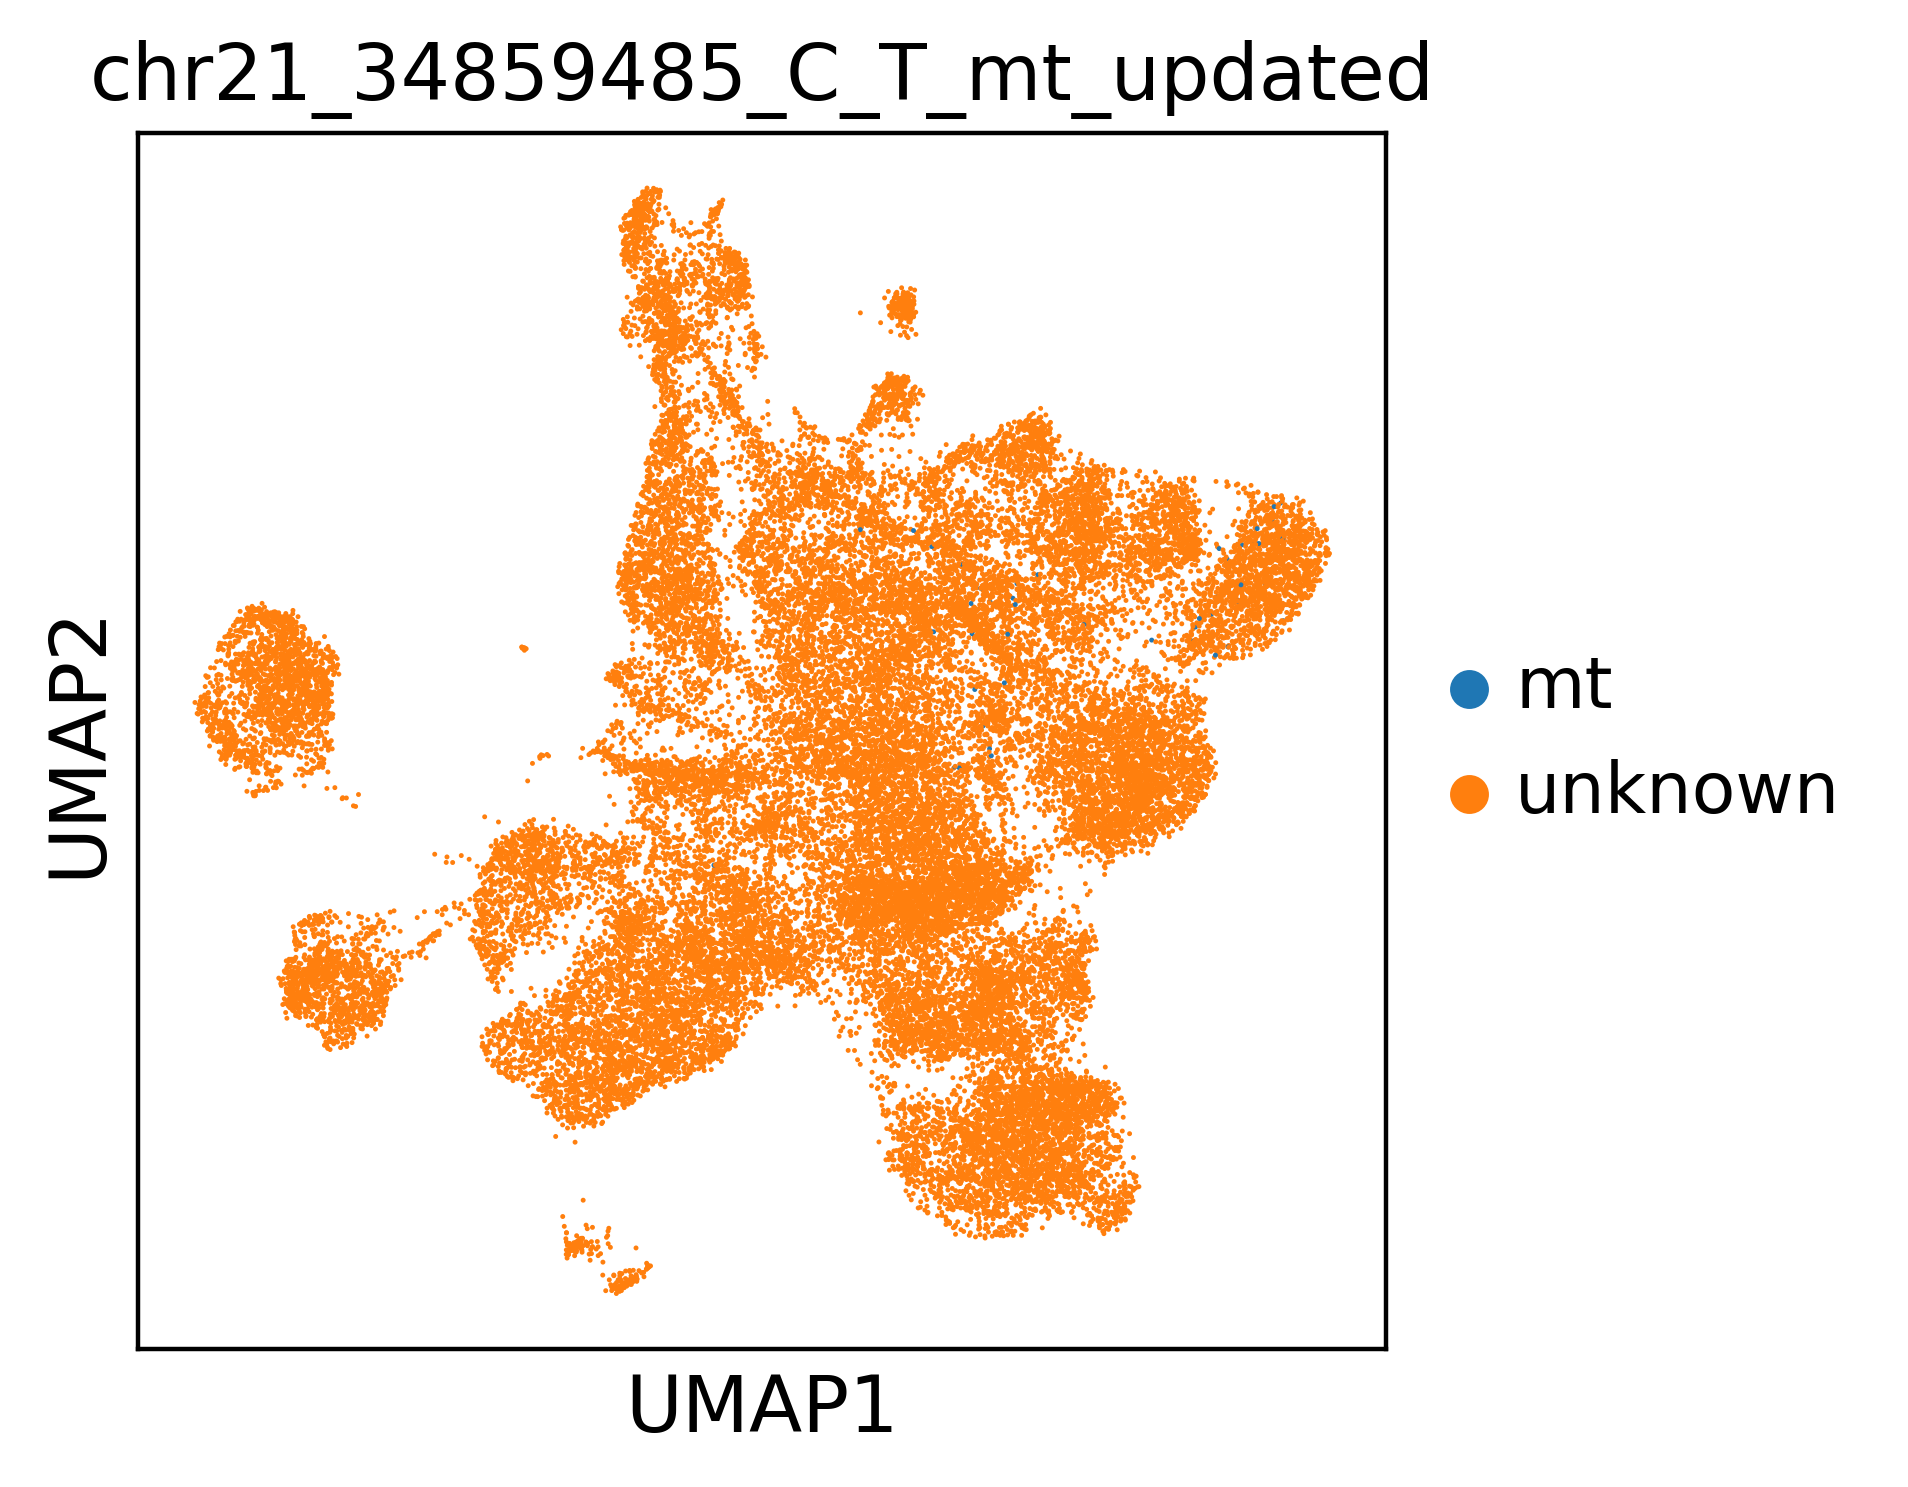

In [9]:
#check that everything is in order
sc.pl.umap(adata, color=['chr21_34859485_C_T_mt_updated'])

In [10]:
from MDS_figure2_dicts import *
mut_df['ctgrey'] = "#e2e2e2"

In [11]:
mut_df

,X_coord_umap,Y_coord_umap,celltype,outcome_C6D28,outcome_C12D29,timepoint_coarse,patient,patient_alias,leiden,chr17_76736877_G_A_call,...,chr17_7676051_G_C_call,chr17_76736877_G_T_call_updated,chr17_76736877_G_A_call_updated,chr17_76736877_G_C_call_updated,chr17_7674250_C_T_call_updated,chr17_7675082_G_T_call_updated,chr21_34886879_G_C_mt_updated,chr1_114716126_C_T_mt_updated,chr21_34859485_C_T_mt_updated,ctgrey
hashtag_C1D1_AAACCTGAGAAGAAGC-1,10.981606,12.418462,Atypical cluster E,Responder,Responder,pre,61289001,P11,20,na,...,na,na,na,na,na,na,unknown,unknown,unknown,#e2e2e2
hashtag_C1D1_AAACCTGAGCGTTTAC-1,12.689439,3.141997,HSC,Responder,Responder,pre,61213005,P12,2,na,...,na,na,na,na,na,na,unknown,unknown,unknown,#e2e2e2
hashtag_C1D1_AAACCTGCAAATCCGT-1,10.337970,12.174479,Atypical cluster E,Responder,Responder,pre,61289001,P11,20,na,...,na,na,na,na,na,na,unknown,unknown,unknown,#e2e2e2
hashtag_C1D1_AAACCTGGTCCAACTA-1,8.816384,7.991989,GMP,Responder,Responder,pre,61213005,P12,5,na,...,na,na,na,na,na,na,unknown,unknown,unknown,#e2e2e2
hashtag_C1D1_AAACGGGCACCATCCT-1,11.258220,14.470355,Atypical cluster F,Responder,Responder,pre,61213005,P12,22,na,...,na,na,na,na,na,na,unknown,unknown,unknown,#e2e2e2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pool7_TTCTACATCCTTTCGG-1,7.360431,14.479185,Monocyte progenitor,Responder,Responder,mid,61213011,P03,12,na,...,na,na,na,na,na,na,unknown,unknown,unknown,#e2e2e2
Pool7_TTCTCAAAGTCCCACG-1,4.390059,-5.537665,Erythroblast,Responder,Responder,mid,61213011,P03,24,na,...,na,na,na,na,na,na,unknown,unknown,unknown,#e2e2e2
Pool7_TTCTCAATCGCAAGCC-1,5.326890,-6.119246,Erythroblast,Responder,Responder,mid,61213011,P03,24,na,...,na,na,na,na,na,na,unknown,unknown,unknown,#e2e2e2
Pool7_TTGAACGAGAGCAATT-1,5.478138,14.661095,Monocyte progenitor,Responder,Responder,mid,61213011,P03,12,na,...,na,na,na,na,na,na,unknown,unknown,unknown,#e2e2e2


In [12]:
mut_df.columns[mut_df.columns.str.contains('updated')]

Index(['chr17_76736877_G_T_call_updated', 'chr17_76736877_G_A_call_updated',
       'chr17_76736877_G_C_call_updated', 'chr17_7674250_C_T_call_updated',
       'chr17_7675082_G_T_call_updated', 'chr21_34886879_G_C_mt_updated',
       'chr1_114716126_C_T_mt_updated', 'chr21_34859485_C_T_mt_updated'],
      dtype='object')

In [13]:
adata.obs[['patient_alias','chr21_34886879_G_C_mt_updated']].value_counts()

patient_alias  chr21_34886879_G_C_mt_updated
P17            unknown                          6016
P18            unknown                          5138
P03            unknown                          4767
P09            unknown                          4572
P02            unknown                          4546
P01            unknown                          4364
P12            unknown                          3675
P08            unknown                          3303
P11            unknown                          1177
C1             unknown                           280
C5             unknown                           193
C2             unknown                            77
P01            mt                                 66
C3             unknown                            32
C4             unknown                            25
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import re

# Define mappings
size_mapping = {'unknown': 10, 'wt': 15, 'mt': 15}
color_map = {'unknown': "#808080", 'wt': "#4997c9", 'mt': "#c70e77"}
zorder_map = {'unknown': 1, 'wt': 2, 'mt': 3}


for chr in mut_df.columns[mut_df.columns.str.contains('updated')]:
    print(chr)
    for p in mut_df['patient_alias'].unique():
        print(p)
        valid_axes_data = []  # Track valid subplots

        for timepoint in ['pre', 'mid', 'post', 'progression']:
            df = mut_df[mut_df['patient_alias'] == p]
            data = df[df['timepoint_coarse'] == timepoint]

            # Count mutations
            counts = data[chr].value_counts()
            unknown_count = counts.get("unknown", 0)
            wt_count = counts.get("wt", 0)
            mt_count = counts.get("mt", 0)

            # Always fix 'unknown' as zorder = 0
            dynamic_zorder_map = {'unknown': 1}

            # Get counts for mt and wt
            mt_count = counts.get('mt', 0)
            wt_count = counts.get('wt', 0)

            # Sort 'mt' and 'wt' by descending count
            sorted_mutations = sorted(
                [('mt', mt_count), ('wt', wt_count)],
                key=lambda x: x[1], reverse=True)

            # Assign zorder starting from 1 (above unknown)
            for i, (mut_type, _) in enumerate(sorted_mutations, start=2):
                dynamic_zorder_map[mut_type] = i

            # Skip subplot if all counts are zero
            if wt_count == 0 and unknown_count == 0 and mt_count == 0:
                continue

            valid_axes_data.append((timepoint, data))

        # If no valid subplots exist, skip this figure
        if not valid_axes_data:
            continue

        # Dynamically create figure with the correct number of subplots
        fig, axes = plt.subplots(1, len(valid_axes_data), figsize=(6 * len(valid_axes_data), 6), dpi=300)

        # Ensure axes is iterable (if only one subplot, `axes` is not a list)
        if len(valid_axes_data) == 1:
            axes = [axes]

        for ax, (timepoint, data) in zip(axes, valid_axes_data):
            # Plot background UMAP scatter (rasterized for efficiency)
            ax.scatter(mut_df['X_coord_umap'], mut_df['Y_coord_umap'], 
                       c=mut_df['ctgrey'], s=5, alpha=0.3, rasterized=True)

            # Overlay mutation points (rasterized for efficiency)
            for category in ['unknown', 'wt', 'mt']:
                subset = data[data[chr] == category]
                if not subset.empty:
                    ax.scatter(subset['X_coord_umap'], subset['Y_coord_umap'],
                               s=size_mapping[category], c=color_map[category],
                               zorder=dynamic_zorder_map[category], edgecolors='none', 
                               label=category, rasterized=True)

            # Display counts
            counts = data[chr].value_counts()
            text_str = f"unknown: {counts.get('unknown', 0)}\nwt: {counts.get('wt', 0)}\nmt: {counts.get('mt', 0)}"
            ax.text(0.95, 0.95, text_str, transform=ax.transAxes, ha="right", va="top", fontsize=15)

            ax.set_title(f"{p} {timepoint}", fontsize=25)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.grid(False)

        # Adjust layout dynamically
        fig.suptitle(chr, fontsize=40)
        fig.tight_layout()

        # Create legend
        handles = [mlines.Line2D([0], [0], marker='o', linestyle='', markersize=20,
                                markerfacecolor=color_map[label],markeredgecolor=color_map[label],
                                label=label) for label in color_map.keys()]
        fig.legend(handles=handles, title='Mutations', loc="upper center",
                   bbox_to_anchor=(0.5, -0.1), fontsize=20, ncol=3)

        # Save figure as PDF with rasterization
        savefigname = re.sub(r"[^\w]", "_", str(chr))
        fig.savefig(f"figures/mutation_calls_v3/{savefigname}_{p}_UMAP.pdf", 
                    format='pdf', bbox_inches='tight', dpi=200)
        #fig.savefig(f"figures/mutation_calls/{savefigname}_{p}_UMAP_v3.png", 
        #            format='png', bbox_inches='tight', dpi=300)            

        plt.close(fig)


chr17_76736877_G_T_call_updated
P11
P12
P08
P01
P09
P18
P02
C4
C3
P17
C1
C5
C2
P03
chr17_76736877_G_A_call_updated
P11
P12
P08
P01
P09
P18
P02
C4
C3
P17
C1
C5
C2
P03
chr17_76736877_G_C_call_updated
P11
P12
P08
P01
P09
P18
P02
C4
C3
P17
C1
C5
C2
P03
chr17_7674250_C_T_call_updated
P11
P12
P08
P01
P09
P18
P02
C4
C3
P17
C1
C5
C2
P03
chr17_7675082_G_T_call_updated
P11
P12
P08
P01
P09
P18
P02
C4
C3
P17
C1
C5
C2
P03
chr21_34886879_G_C_mt_updated
P11
P12
P08
P01
P09
P18
P02
C4
C3
P17
C1
C5
C2
P03
chr1_114716126_C_T_mt_updated
P11
P12
P08
P01
P09
P18
P02
C4
C3
P17
C1
C5
C2
P03
chr21_34859485_C_T_mt_updated
P11
P12
P08
P01
P09
P18
P02
C4
C3
P17
C1
C5
C2
P03


# Update some calls from unknown to WT

In [2]:
adata = sc.read_h5ad("17052025_celltypev3_mutations.h5ad")
adata

AnnData object with n_obs × n_vars = 38231 × 28762
    obs: 'BARCODE', 'BEST', 'category', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'patient', 'dataset_name', 'timepoint', 'disease_state', 'outcome_C12D29', 'specific_outcome_C12D29', 'dataset', 'celltype', 'barcode', 'celltype_group', 'outcome_C6D28', 'specific_outcome_C6D28', 'timepoint_coarse', 'leiden', 'new_celltype', 'patient_alias', 'leiden_and_celltype', 'chr17_76736877_G_A_call', 'chr17_76736877_G_A_mut', 'chr17_76736877_G_C_call', 'chr17_76736877_G_C_mut', 'chr17_76736877_G_T_call', 'chr17_76736877_G_T_mut', 'chr17_7674250_C_T_call', 'chr17_7674250_C_T_mut', 'chr17_7675082_G_T_call', 'chr17_7675082_G_T_mut', 'chr17_7676051_G_C_call', 'chr17_7676051_G_C_mut', 'infercnv_new_celltype', 'inflammation_score', 'LSC17_score', 'cell_cycle_score', 'S_score', 'G2M_score', 'phase', 'celltype_v2', 'celltype_v3', 'chr17_76736877_G_T_call_updated', 'chr17_767

In [3]:
mt_file = pd.read_csv("data/tp53_incorrect_genotyping.csv")
mt_file

,Unnamed: 0,BARCODE,timepoint,celltype_v2,TP53_mutation,patient_alias
0,ACTGAGTTCTAACTGG-1,ACTGAGTTCTAACTGG-1,Progression,Atypical cluster B,chr17_7674250_C_T,P18
1,CACACCTGTTGCCTCT-1,CACACCTGTTGCCTCT-1,Progression,Atypical cluster B,chr17_7674250_C_T,P18
2,CTGAAACAGTATTGGA-1,CTGAAACAGTATTGGA-1,Progression,Atypical cluster B,chr17_7674250_C_T,P18
3,GCACATACATAGGATA-1,GCACATACATAGGATA-1,Progression,Atypical cluster B,chr17_7674250_C_T,P18
4,GGGCATCCATCTACGA-1,GGGCATCCATCTACGA-1,Progression,Atypical cluster B,chr17_7674250_C_T,P18
5,GTATCTTGTAAGTAGT-1,GTATCTTGTAAGTAGT-1,Progression,Atypical cluster B,chr17_7674250_C_T,P18
6,GTTACAGTCCGAGCCA-1,GTTACAGTCCGAGCCA-1,Progression,Atypical cluster B,chr17_7674250_C_T,P18
7,TATCAGGCAACGATGG-1,TATCAGGCAACGATGG-1,Progression,Atypical cluster B,chr17_7674250_C_T,P18
8,TGACTAGAGTACGTAA-1,TGACTAGAGTACGTAA-1,Progression,Atypical cluster B,chr17_7674250_C_T,P18
9,TTGTAGGTCCTCAATT-1,TTGTAGGTCCTCAATT-1,C1D1,Atypical cluster A,chr17_7674250_C_T,P18


In [4]:
adata

AnnData object with n_obs × n_vars = 38231 × 28762
    obs: 'BARCODE', 'BEST', 'category', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'patient', 'dataset_name', 'timepoint', 'disease_state', 'outcome_C12D29', 'specific_outcome_C12D29', 'dataset', 'celltype', 'barcode', 'celltype_group', 'outcome_C6D28', 'specific_outcome_C6D28', 'timepoint_coarse', 'leiden', 'new_celltype', 'patient_alias', 'leiden_and_celltype', 'chr17_76736877_G_A_call', 'chr17_76736877_G_A_mut', 'chr17_76736877_G_C_call', 'chr17_76736877_G_C_mut', 'chr17_76736877_G_T_call', 'chr17_76736877_G_T_mut', 'chr17_7674250_C_T_call', 'chr17_7674250_C_T_mut', 'chr17_7675082_G_T_call', 'chr17_7675082_G_T_mut', 'chr17_7676051_G_C_call', 'chr17_7676051_G_C_mut', 'infercnv_new_celltype', 'inflammation_score', 'LSC17_score', 'cell_cycle_score', 'S_score', 'G2M_score', 'phase', 'celltype_v2', 'celltype_v3', 'chr17_76736877_G_T_call_updated', 'chr17_767

In [5]:
mt_file['mut_column'] = mt_file['TP53_mutation']+'_call_updated'

In [6]:
mt_file

,Unnamed: 0,BARCODE,timepoint,celltype_v2,TP53_mutation,patient_alias,mut_column
0,ACTGAGTTCTAACTGG-1,ACTGAGTTCTAACTGG-1,Progression,Atypical cluster B,chr17_7674250_C_T,P18,chr17_7674250_C_T_call_updated
1,CACACCTGTTGCCTCT-1,CACACCTGTTGCCTCT-1,Progression,Atypical cluster B,chr17_7674250_C_T,P18,chr17_7674250_C_T_call_updated
2,CTGAAACAGTATTGGA-1,CTGAAACAGTATTGGA-1,Progression,Atypical cluster B,chr17_7674250_C_T,P18,chr17_7674250_C_T_call_updated
3,GCACATACATAGGATA-1,GCACATACATAGGATA-1,Progression,Atypical cluster B,chr17_7674250_C_T,P18,chr17_7674250_C_T_call_updated
4,GGGCATCCATCTACGA-1,GGGCATCCATCTACGA-1,Progression,Atypical cluster B,chr17_7674250_C_T,P18,chr17_7674250_C_T_call_updated
5,GTATCTTGTAAGTAGT-1,GTATCTTGTAAGTAGT-1,Progression,Atypical cluster B,chr17_7674250_C_T,P18,chr17_7674250_C_T_call_updated
6,GTTACAGTCCGAGCCA-1,GTTACAGTCCGAGCCA-1,Progression,Atypical cluster B,chr17_7674250_C_T,P18,chr17_7674250_C_T_call_updated
7,TATCAGGCAACGATGG-1,TATCAGGCAACGATGG-1,Progression,Atypical cluster B,chr17_7674250_C_T,P18,chr17_7674250_C_T_call_updated
8,TGACTAGAGTACGTAA-1,TGACTAGAGTACGTAA-1,Progression,Atypical cluster B,chr17_7674250_C_T,P18,chr17_7674250_C_T_call_updated
9,TTGTAGGTCCTCAATT-1,TTGTAGGTCCTCAATT-1,C1D1,Atypical cluster A,chr17_7674250_C_T,P18,chr17_7674250_C_T_call_updated


In [7]:
for i,v in enumerate(mt_file['BARCODE']):
    pos = mt_file.iloc[i]
    mask = ((adata.obs['BARCODE'] == pos['BARCODE']) & 
            (adata.obs['timepoint'] == pos['timepoint']) & 
            (adata.obs['celltype_v2'] == pos['celltype_v2']) & 
            (adata.obs['patient_alias'] == pos['patient_alias']))
    adata.obs.loc[mask, pos['mut_column']] = "wt"
    print(adata.obs.loc[mask, pos['mut_column']])
    

HSPC_pool1_ACTGAGTTCTAACTGG-1    wt
Name: chr17_7674250_C_T_call_updated, dtype: category
Categories (4, object): ['mt', 'na', 'unknown', 'wt']
HSPC_pool1_CACACCTGTTGCCTCT-1    wt
Name: chr17_7674250_C_T_call_updated, dtype: category
Categories (4, object): ['mt', 'na', 'unknown', 'wt']
HSPC_pool1_CTGAAACAGTATTGGA-1    wt
Name: chr17_7674250_C_T_call_updated, dtype: category
Categories (4, object): ['mt', 'na', 'unknown', 'wt']
HSPC_pool1_GCACATACATAGGATA-1    wt
Name: chr17_7674250_C_T_call_updated, dtype: category
Categories (4, object): ['mt', 'na', 'unknown', 'wt']
HSPC_pool1_GGGCATCCATCTACGA-1    wt
Name: chr17_7674250_C_T_call_updated, dtype: category
Categories (4, object): ['mt', 'na', 'unknown', 'wt']
HSPC_pool1_GTATCTTGTAAGTAGT-1    wt
Name: chr17_7674250_C_T_call_updated, dtype: category
Categories (4, object): ['mt', 'na', 'unknown', 'wt']
HSPC_pool1_GTTACAGTCCGAGCCA-1    wt
Name: chr17_7674250_C_T_call_updated, dtype: category
Categories (4, object): ['mt', 'na', 'unknown'

In [8]:
adata.obs.loc[mask]

,BARCODE,BEST,category,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,...,celltype_v2,celltype_v3,chr17_76736877_G_T_call_updated,chr17_76736877_G_A_call_updated,chr17_76736877_G_C_call_updated,chr21_34886879_G_C_mt_updated,chr1_114716126_C_T_mt_updated,chr21_34859485_C_T_mt_updated,chr17_7674250_C_T_call_updated,chr17_7675082_G_T_call_updated
HSPC_pool4_GGTGCGTAGACAGAGA-1,GGTGCGTAGACAGAGA-1,SNG-207071120017_R07C01,Single,4411,4410,15550.0,448.0,2.881029,2985.0,19.19614,...,Atypical cluster D,Atypical cluster D,unknown,wt,wt,unknown,unknown,unknown,wt,wt


In [9]:
adata.write_h5ad("11072025_celltypev3_updated_mutations.h5ad")

In [39]:
mut_df=pd.DataFrame({
    "X_coord_umap":adata.obsm["X_umap"][:,0],
    "Y_coord_umap":adata.obsm["X_umap"][:,1],
    "celltype":adata.obs["celltype_v3"],
    "outcome_C6D28":adata.obs["outcome_C6D28"],
    'outcome_C12D29':adata.obs["outcome_C12D29"],
    "timepoint_coarse":adata.obs["timepoint_coarse"],
    "patient":adata.obs["patient"],
    "patient_alias": adata.obs["patient_alias"],
    'leiden': adata.obs["leiden"],
    'chr17_76736877_G_A_call': adata.obs['chr17_76736877_G_A_call'],
    'chr17_76736877_G_C_call': adata.obs['chr17_76736877_G_C_call'],
    'chr17_76736877_G_T_call': adata.obs['chr17_76736877_G_T_call'],
    'chr17_7674250_C_T_call': adata.obs['chr17_7674250_C_T_call'],
    'chr17_7675082_G_T_call': adata.obs['chr17_7675082_G_T_call'],
    'chr17_7676051_G_C_call': adata.obs['chr17_7676051_G_C_call'],
    'chr17_76736877_G_T_call_updated': adata.obs['chr17_76736877_G_T_call_updated'],
    'chr17_76736877_G_A_call_updated': adata.obs['chr17_76736877_G_A_call_updated'],
    'chr17_76736877_G_C_call_updated': adata.obs['chr17_76736877_G_C_call_updated'],
    'chr17_7674250_C_T_call_updated': adata.obs['chr17_7674250_C_T_call_updated'],
    'chr17_7675082_G_T_call_updated': adata.obs['chr17_7675082_G_T_call_updated'],
    'chr21_34886879_G_C_mt_updated':adata.obs['chr21_34886879_G_C_mt_updated'],
    'chr1_114716126_C_T_mt_updated':adata.obs['chr1_114716126_C_T_mt_updated'],
    'chr21_34859485_C_T_mt_updated':adata.obs['chr21_34859485_C_T_mt_updated'],
})
mut_df

,X_coord_umap,Y_coord_umap,celltype,outcome_C6D28,outcome_C12D29,timepoint_coarse,patient,patient_alias,leiden,chr17_76736877_G_A_call,...,chr17_7675082_G_T_call,chr17_7676051_G_C_call,chr17_76736877_G_T_call_updated,chr17_76736877_G_A_call_updated,chr17_76736877_G_C_call_updated,chr17_7674250_C_T_call_updated,chr17_7675082_G_T_call_updated,chr21_34886879_G_C_mt_updated,chr1_114716126_C_T_mt_updated,chr21_34859485_C_T_mt_updated
hashtag_C1D1_AAACCTGAGAAGAAGC-1,10.981606,12.418462,Atypical cluster E,Responder,Responder,pre,61289001,P11,20,na,...,na,na,na,na,na,na,na,unknown,unknown,unknown
hashtag_C1D1_AAACCTGAGCGTTTAC-1,12.689439,3.141997,HSC,Responder,Responder,pre,61213005,P12,2,na,...,na,na,na,na,na,na,na,unknown,unknown,unknown
hashtag_C1D1_AAACCTGCAAATCCGT-1,10.337970,12.174479,Atypical cluster E,Responder,Responder,pre,61289001,P11,20,na,...,na,na,na,na,na,na,na,unknown,unknown,unknown
hashtag_C1D1_AAACCTGGTCCAACTA-1,8.816384,7.991989,GMP,Responder,Responder,pre,61213005,P12,5,na,...,na,na,na,na,na,na,na,unknown,unknown,unknown
hashtag_C1D1_AAACGGGCACCATCCT-1,11.258220,14.470355,Atypical cluster F,Responder,Responder,pre,61213005,P12,22,na,...,na,na,na,na,na,na,na,unknown,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pool7_TTCTACATCCTTTCGG-1,7.360431,14.479185,Monocyte progenitor,Responder,Responder,mid,61213011,P03,12,na,...,na,na,na,na,na,na,na,unknown,unknown,unknown
Pool7_TTCTCAAAGTCCCACG-1,4.390059,-5.537665,Erythroblast,Responder,Responder,mid,61213011,P03,24,na,...,na,na,na,na,na,na,na,unknown,unknown,unknown
Pool7_TTCTCAATCGCAAGCC-1,5.326890,-6.119246,Erythroblast,Responder,Responder,mid,61213011,P03,24,na,...,na,na,na,na,na,na,na,unknown,unknown,unknown
Pool7_TTGAACGAGAGCAATT-1,5.478138,14.661095,Monocyte progenitor,Responder,Responder,mid,61213011,P03,12,na,...,na,na,na,na,na,na,na,unknown,unknown,unknown


In [40]:
from MDS_figure2_dicts import *
mut_df['ctgrey'] = "#e2e2e2"

In [41]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import re

# Define mappings
size_mapping = {'unknown': 10, 'wt': 15, 'mt': 15}
color_map = {'unknown': "#808080", 'wt': "#4997c9", 'mt': "#c70e77"}
zorder_map = {'unknown': 1, 'wt': 2, 'mt': 3}

tp53 = ['chr17_7674250_C_T_call_updated',
        'chr17_7675082_G_T_call_updated']
for chr in tp53:
    print(chr)
    for p in ['P03','P18']:
        print(p)
        valid_axes_data = []  # Track valid subplots

        for timepoint in ['pre', 'mid', 'post', 'progression']:
            df = mut_df[mut_df['patient_alias'] == p]
            data = df[df['timepoint_coarse'] == timepoint]

            # Count mutations
            counts = data[chr].value_counts()
            unknown_count = counts.get("unknown", 0)
            wt_count = counts.get("wt", 0)
            mt_count = counts.get("mt", 0)

            # Always fix 'unknown' as zorder = 0
            dynamic_zorder_map = {'unknown': 1}

            # Get counts for mt and wt
            mt_count = counts.get('mt', 0)
            wt_count = counts.get('wt', 0)

            # Sort 'mt' and 'wt' by descending count
            sorted_mutations = sorted(
                [('mt', mt_count), ('wt', wt_count)],
                key=lambda x: x[1], reverse=True)

            # Assign zorder starting from 1 (above unknown)
            for i, (mut_type, _) in enumerate(sorted_mutations, start=2):
                dynamic_zorder_map[mut_type] = i

            # Skip subplot if all counts are zero
            if wt_count == 0 and unknown_count == 0 and mt_count == 0:
                continue

            valid_axes_data.append((timepoint, data))

        # If no valid subplots exist, skip this figure
        if not valid_axes_data:
            continue

        # Dynamically create figure with the correct number of subplots
        fig, axes = plt.subplots(1, len(valid_axes_data), figsize=(6 * len(valid_axes_data), 6), dpi=300)

        # Ensure axes is iterable (if only one subplot, `axes` is not a list)
        if len(valid_axes_data) == 1:
            axes = [axes]

        for ax, (timepoint, data) in zip(axes, valid_axes_data):
            # Plot background UMAP scatter (rasterized for efficiency)
            ax.scatter(mut_df['X_coord_umap'], mut_df['Y_coord_umap'], 
                       c=mut_df['ctgrey'], s=5, alpha=0.3, rasterized=True)

            # Overlay mutation points (rasterized for efficiency)
            for category in ['unknown', 'wt', 'mt']:
                subset = data[data[chr] == category]
                if not subset.empty:
                    ax.scatter(subset['X_coord_umap'], subset['Y_coord_umap'],
                               s=size_mapping[category], c=color_map[category],
                               zorder=dynamic_zorder_map[category], edgecolors='none', 
                               label=category, rasterized=True)

            # Display counts
            counts = data[chr].value_counts()
            text_str = f"unknown: {counts.get('unknown', 0)}\nwt: {counts.get('wt', 0)}\nmt: {counts.get('mt', 0)}"
            ax.text(0.95, 0.95, text_str, transform=ax.transAxes, ha="right", va="top", fontsize=15)

            ax.set_title(f"{p} {timepoint}", fontsize=25)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.grid(False)

        # Adjust layout dynamically
        fig.suptitle(chr, fontsize=40)
        fig.tight_layout()

        # Create legend
        handles = [mlines.Line2D([0], [0], marker='o', linestyle='', markersize=20,
                                markerfacecolor=color_map[label],markeredgecolor=color_map[label],
                                label=label) for label in color_map.keys()]
        fig.legend(handles=handles, title='Mutations', loc="upper center",
                   bbox_to_anchor=(0.5, -0.1), fontsize=20, ncol=3)

        # Save figure as PDF with rasterization
        savefigname = re.sub(r"[^\w]", "_", str(chr))
        fig.savefig(f"figures/mutation_calls_v4/{savefigname}_{p}_UMAP.pdf", 
                    format='pdf', bbox_inches='tight', dpi=200)
        #fig.savefig(f"figures/mutation_calls/{savefigname}_{p}_UMAP_v3.png", 
        #            format='png', bbox_inches='tight', dpi=300)            

        plt.close(fig)


chr17_7674250_C_T_call_updated
P03
P18
chr17_7675082_G_T_call_updated
P03
P18
